###### Data Description : 
    
    Dataset has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
    The task is to create a predictive model that predicts if an insurance claim is fraudulent or not. 

###### Importing the libraries:

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###### Acquiring the Data:

In [200]:
data=pd.read_csv("InsuranceClaims-FraudDetection.csv")
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [201]:
data.shape

(1000, 40)

There are 40 columns in the dataset.

In [202]:
pd.set_option('display.max_columns', None)
data.head(15)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


    > There are not much of continuous data columns. Many categorical columns in the dataset.
    > We can remove many columns, which are not informative for us to predict.
    > Target variable is the Binary output(Yes/No), hence we can go for classification problem.

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

    > The last column _c39 has no data, we can drop this column from the dataset.
    > Other than _c39, there is no null values in the dataset. 
    > But there are missing values in the dataset with "?", we may have to replace this missing value with some data.

In [204]:
data.drop(["_c39"], axis=1, inplace= True)

In [205]:
#Statistical Summary:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [206]:
#Lets check all the unique values from each categorical columns

for col in data.select_dtypes(include='object').columns:
    print("Value counts for column :",col)
    print(data[col].value_counts())
    print('\n')

Value counts for column : policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
08-11-2009    2
03-01-2004    2
             ..
15-04-2004    1
22-09-1990    1
17-11-2009    1
05-06-2011    1
09-01-2002    1
Name: policy_bind_date, Length: 951, dtype: int64


Value counts for column : policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


Value counts for column : policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


Value counts for column : insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


Value counts for column : insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


Value counts for column : insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair 

We have missing values in column collision_type(178), property_damage(360), police_report_available(343)

###### Check for Missing Values:
    We have already seen there are many missing values in the datset with "?". Lets find out them and fill with appropriate vales.

In [207]:
Mis_val_rel = pd.crosstab(data["incident_type"], data["collision_type"], margins=True)

In [208]:
Mis_val_rel

collision_type,?,Front Collision,Rear Collision,Side Collision,All
incident_type,,,,,
Multi-vehicle Collision,0,115,152,152,419
Parked Car,84,0,0,0,84
Single Vehicle Collision,0,139,140,124,403
Vehicle Theft,94,0,0,0,94
All,178,254,292,276,1000


    > By referring the above data, Missing values in collision_type column only for the Parked car and Vehicle Theft.
    > we can fill missing values of column "collision_type" by No Collision as the incident type does not cause any collision.

In [209]:
data["collision_type"]=data["collision_type"].str.replace("?", "No Collision", regex=True)

In [210]:
data["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
No Collision       178
Name: collision_type, dtype: int64

Now lets check for the property_damage column

In [211]:
Mis_val_damage = pd.crosstab(data["incident_type"], data["property_damage"], margins=True)

In [212]:
Mis_val_damage

property_damage,?,NO,YES,All
incident_type,,,,
Multi-vehicle Collision,152,144,123,419
Parked Car,31,31,22,84
Single Vehicle Collision,145,129,129,403
Vehicle Theft,32,34,28,94
All,360,338,302,1000


Here we can fill missing values by Yes for the incident_type : Multi-vehicle Collision and Single Vehicle Collision and No for Parked Car & Vehicle theft by assuming single or multi vehicle collision will cause property damage to the vehicle.

In [213]:

#DataFrame['column_name'] = numpy.where(condition, new_value, DataFrame.column_name)
data["property_damage"]=np.where(((data["incident_type"].values == "Multi-vehicle Collision")&(data["property_damage"].values=='?')), "YES", data["property_damage"])

In [214]:
data["property_damage"]=np.where(((data["incident_type"].values == "Single Vehicle Collision")&(data["property_damage"].values=='?')), "YES", data["property_damage"])

In [215]:
#Lets fill all other Missing values in the "property_damage" with NO.
data["property_damage"]=data["property_damage"].str.replace("?", "NO", regex=True)

In [216]:
data["property_damage"].value_counts()

YES    599
NO     401
Name: property_damage, dtype: int64

Now lets check "police_report_available" column with "incident_type" column. Lets assume that for Vehicle Theft there will be police report available as Yes. 

In [217]:
Mis_val_police = pd.crosstab(data["incident_type"], data["police_report_available"], margins=True)
Mis_val_police

police_report_available,?,NO,YES,All
incident_type,,,,
Multi-vehicle Collision,151,139,129,419
Parked Car,26,37,21,84
Single Vehicle Collision,136,132,135,403
Vehicle Theft,30,35,29,94
All,343,343,314,1000


In [218]:
#Lets check propert damage and police report available columns together
Mis_val_police1 = pd.crosstab(data["property_damage"], data["police_report_available"], margins=True)
Mis_val_police1

police_report_available,?,NO,YES,All
property_damage,,,,
NO,132,155,114,401
YES,211,188,200,599
All,343,343,314,1000


In [219]:
mis_val=pd.crosstab([data["property_damage"], data["incident_type"]],data["police_report_available"], margins=True )
mis_val

police_report_available                     ?   NO  YES   All
property_damage incident_type                                
NO              Multi-vehicle Collision    54   52   38   144
                Parked Car                 17   30   15    62
                Single Vehicle Collision   41   45   43   129
                Vehicle Theft              20   28   18    66
YES             Multi-vehicle Collision    97   87   91   275
                Parked Car                  9    7    6    22
                Single Vehicle Collision   95   87   92   274
                Vehicle Theft              10    7   11    28
All                                       343  343  314  1000

Lets fill missing values of police_report_available by No if the proprty_damage is NO and yes if the property_damage is yes.

In [220]:
data["police_report_available"]=np.where(((data["property_damage"].values=='NO')&(data["police_report_available"].values=='?')), "NO", data["police_report_available"])
data["police_report_available"]=np.where(((data["property_damage"].values=='YES')&(data["police_report_available"].values=='?')), "YES", data["police_report_available"])

In [221]:
data["police_report_available"].value_counts()

YES    525
NO     475
Name: police_report_available, dtype: int64

Now we have complete data. Lets check how many unique values are available in our object/categorical type data columns

In [222]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,No Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,YES,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,No Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [223]:
unique_val=[]
col_name=[]
uni_val=pd.DataFrame()
for col in data:
    if data[col].dtype == 'object':
        col_name.append(str(col))
        unique_val.append(data[col].nunique())
uni_val["col_name"]=col_name
uni_val["unique_val"]=unique_val


In [224]:
uni_val=uni_val.sort_values("unique_val", ascending=False)

In [225]:
uni_val

,col_name,unique_val
15,incident_location,1000
0,policy_bind_date,951
8,incident_date,60
19,auto_model,39
6,insured_hobbies,20
18,auto_make,14
5,insured_occupation,14
4,insured_education_level,7
14,incident_city,7
13,incident_state,7


From the above data, we canexclude the column incident_location as it has all the unique values which has no good information.
Also we can exlude all the dates(policy_bind_data, incident_date). auto_model has nothing to do with prediction of fruadent or not, so we can exclude this column as well.
Also we can exclude policy_number as its just reference IDs.

In [226]:
data.drop(["policy_number", "incident_location", "policy_bind_date", "incident_date", "auto_model"], axis=1, inplace=True)

In [227]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,No Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,YES,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,No Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,2009,N


In [228]:
df=pd.DataFrame(data, columns=data.columns)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,No Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,YES,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,No Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,2009,N


###### OrdinalEncoding:

Lets encode all our objecttype or categorical type data into numeric values by using OrdinalEncoding Technique

In [229]:
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [230]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,2.0,17.0,0.0,53300,0,2.0,3.0,0.0,4.0,4.0,1.0,5,1,1.0,1,2,1.0,71610,6510,13020,52080,10.0,2004,1.0
1,228,42,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,6.0,15.0,2.0,0,0,3.0,1.0,1.0,4.0,5.0,5.0,8,1,0.0,0,0,0.0,5070,780,780,3510,8.0,2007,1.0
2,134,29,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,11.0,2.0,3.0,35100,0,0.0,2.0,1.0,4.0,1.0,1.0,7,3,0.0,2,3,0.0,34650,7700,3850,23100,4.0,2007,0.0
3,256,41,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,1.0,2.0,4.0,48900,-62400,2.0,0.0,0.0,4.0,2.0,0.0,5,1,1.0,1,2,0.0,63400,6340,6340,50720,3.0,2014,1.0
4,228,44,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,11.0,2.0,4.0,66000,-46000,3.0,1.0,1.0,2.0,1.0,0.0,20,1,0.0,0,1,0.0,6500,1300,650,4550,0.0,2009,0.0


###### Correlation Matrix :

Lets check the correlation between the feature set and the target variable.

In [231]:
data_cor=data.corr(method='pearson')

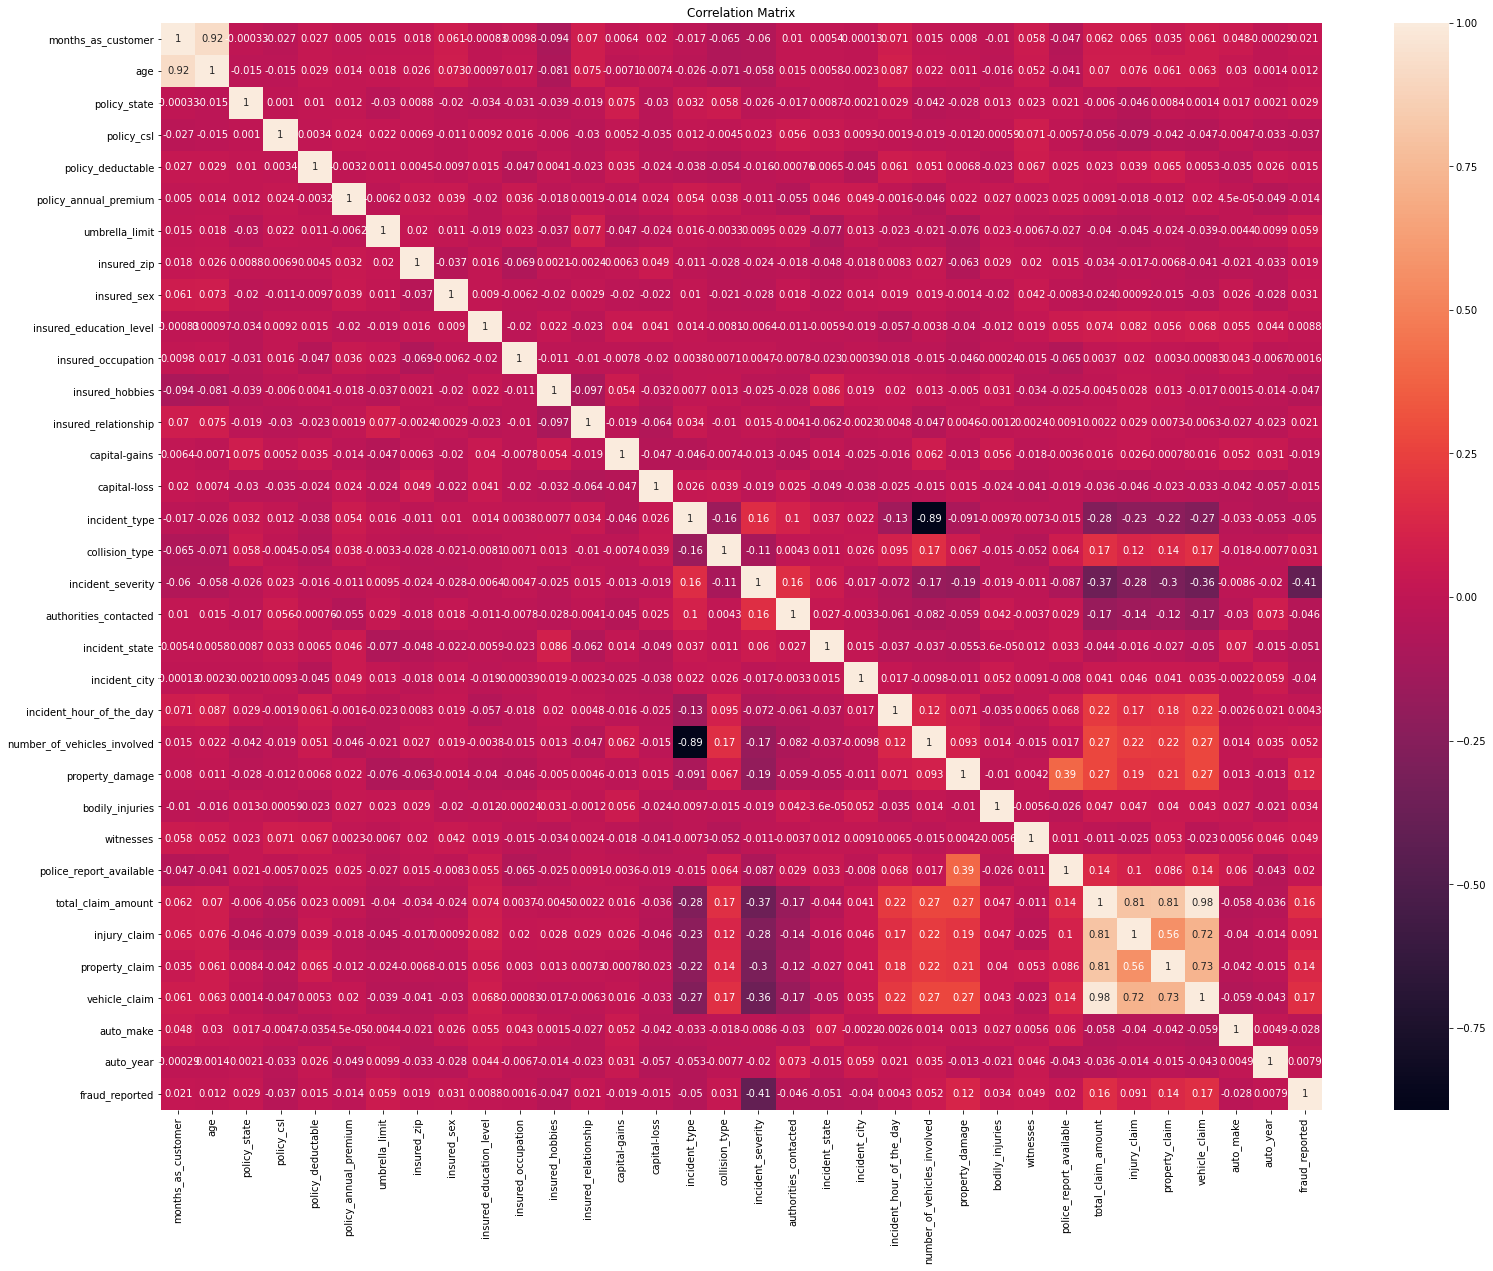

In [232]:
plt.figure(figsize=(26,20))
sns.heatmap(data.corr(method='pearson'), annot=True)
plt.title("Correlation Matrix")
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.show()

In [233]:
display(data.corr())

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.017377,-0.065432,-0.059581,0.010021,0.005369,-0.000130,0.070639,0.014736,0.007990,-0.010162,0.058383,-0.047147,0.062108,0.065329,0.034940,0.061013,0.047655,-0.000292,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,-0.025626,-0.071117,-0.058439,0.015417,0.005770,-0.002291,0.087161,0.022102,0.011200,-0.015679,0.052359,-0.041143,0.069863,0.075522,0.060898,0.062588,0.030410,0.001354,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.031848,0.057763,-0.026377,-0.016777,0.008723,-0.002077,0.029457,-0.042263,-0.027972,0.013384,0.022960,0.020856,-0.006002,-0.046290,0.008406,0.001425,0.017124,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.009153,0.015788,-0.005960,-0.030063,0.005249,-0.034612,0.011997,-0.004458,0.022530,0.056182,0.032814,0.009333,-0.001869,-0.019403,-0.011797,-0.000595,0.071500,-0.005665,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.038411,-0.054085,-0.015711,-0.000760,0.006517,-0.045117,0.060935,0.051214,0.006793,-0.022765,0.066639,0.024886,0.022839,0.039107,0.064792,0.005269,-0.035379,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.053603,0.037877,-0.011155,-0.055191,0.046434,0.048724,-0.001578,-0.045991,0.021650,0.026780,0.002332,0.025422,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,0.023422,-0.037000,0.077495,-0.047268,-0.024056,0.015966,-0.003279,0.009466,0.029044,-0.077492,0.013094,-0.023257,-0.021270,-0.075972,0.022743,-0.006738,-0.027056,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.009893,0.058622
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,-0.069077,0.002106,-0.002355,0.006303,0.049372,-0.010840,-0.028082,-0.023855,-0.017548,-0.047669,-0.017532,0.008274,0.027448,-0.063365,0.028695,0.019805,0.014832,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,-0.032736,0.019368
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,-0.006160,-0.020317,0.002855,-0.020494,-0.021705,0.009952,-0.021391,-0.028168,0.017914,-0.022379,0.014470,0.019290,0.018793,-0.001379,-0.020297,0.042463,-0.008333,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.016079,0.009002,1.000000,-0.020298,0.021807,-0.023488,0.039912,0.041193,0.013704,-0.008073,-0.006420,-0.010838,-0.005903,-0.018636,-0.057061,-0.003768,-0.040476,-0.012072,0.019211,0.055370,0.074226,0.081880,0.055794,0.068348,0.055202,0.043509,0.008808


In [234]:
data_cor["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
property_damage                0.118502
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
collision_type                 0.031032
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
police_report_available        0.020082
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
policy_annual_premium         -0.014480
capital-loss                  -0.014863


incident_severity has high negative correlation with fraud_reported followed by vehicle_claim,total_claim_amount,property_claim,property_damage, etc.

###### EDA :

In [236]:
data.shape

(1000, 34)

In [237]:
#months_as_customer Vs fraud_reported :

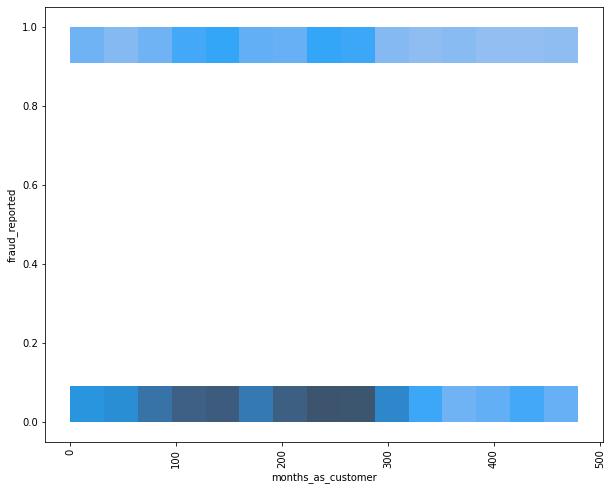

In [238]:
plt.figure(figsize=(10,8))
sns.histplot(x=data["months_as_customer"], y=data["fraud_reported"], data=data)
plt.xticks(rotation='vertical')
plt.show()

In [239]:
#age Vs fraud_reported :

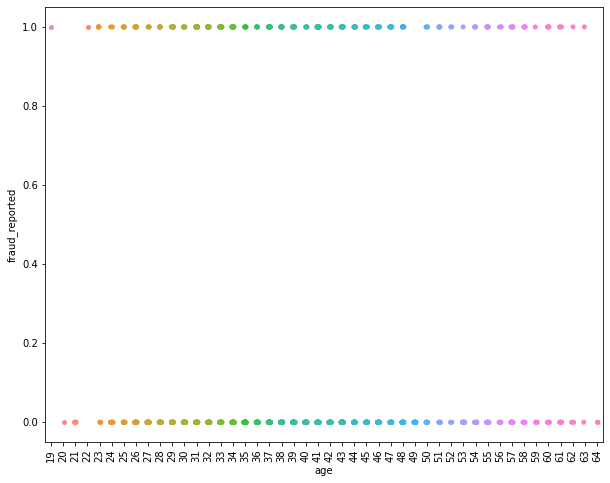

In [240]:
plt.figure(figsize=(10,8))
sns.stripplot(x=data["age"], y=data["fraud_reported"], data=data)
plt.xticks(rotation='vertical')
plt.show()

In [241]:
#policy_state Vs fraud_reported :

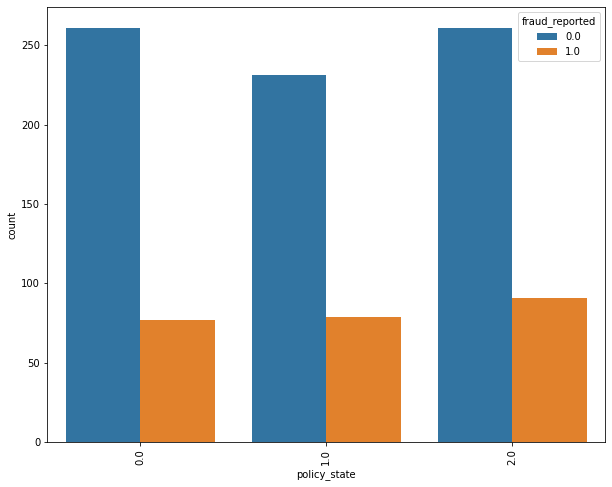

In [254]:
plt.figure(figsize=(10,8))
sns.countplot(x=data["policy_state"], hue=data["fraud_reported"], data=data)
plt.xticks(rotation='vertical')
plt.show()

Fraud has been reported irrespective of the policy state. More 20% of policies from each policy state are reported as fraudulent. 

In [246]:
#policy_csl Vs fraud_reported :

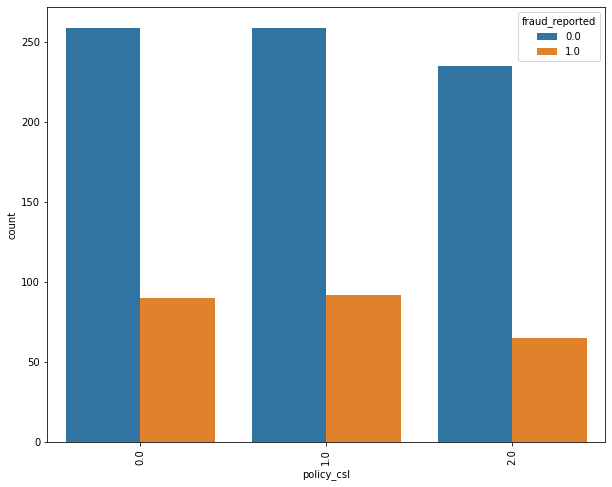

In [247]:
plt.figure(figsize=(10,8))
sns.countplot(x=data["policy_csl"], hue=data["fraud_reported"], data=data)
plt.xticks(rotation='vertical')
plt.show()

More than 20% of policy_csls are found to be fraudulent.

In [ ]:
#policy_deductable Vs fraud_reported :

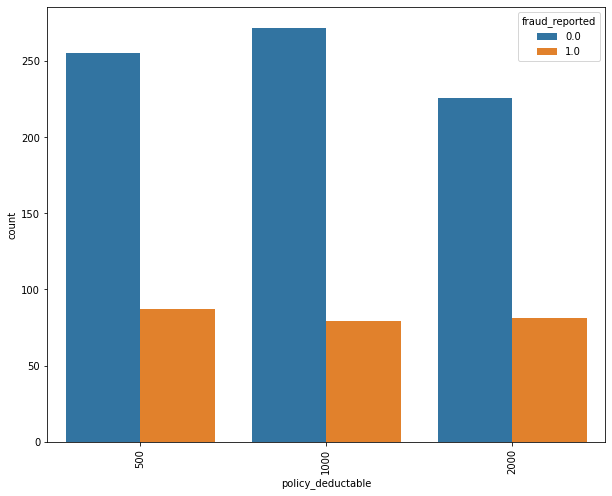

In [248]:
plt.figure(figsize=(10,8))
sns.countplot(x=data["policy_deductable"], hue=data["fraud_reported"], data=data)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#policy_annual_premium Vs fraud_reported :

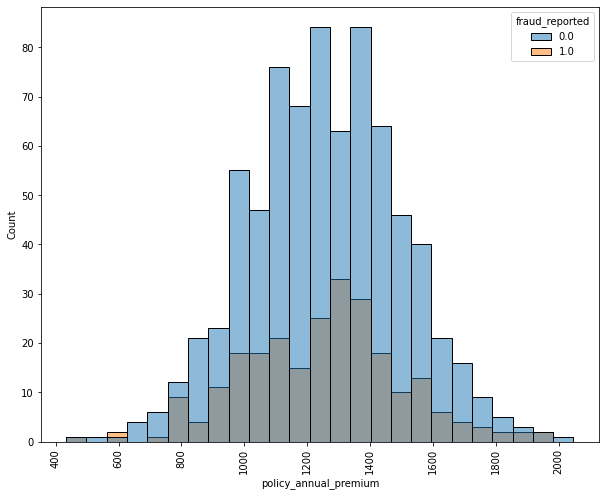

In [255]:
plt.figure(figsize=(10,8))
sns.histplot(x=data["policy_annual_premium"], hue=data["fraud_reported"], data=data)
plt.xticks(rotation='vertical')
plt.show()

More fraud has found when the policy annual premium was higher.

In [ ]:
#umbrella_limit Vs fraud_reported :

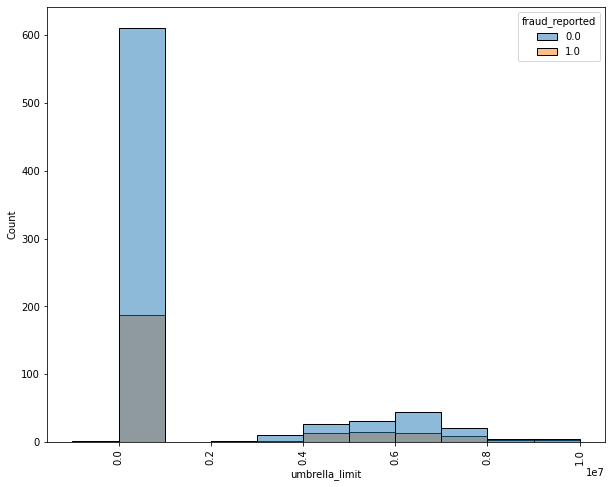

In [256]:
plt.figure(figsize=(10,8))
sns.histplot(x=data["umbrella_limit"], hue=data["fraud_reported"], data=data)
plt.xticks(rotation='vertical')
plt.show()

In [257]:
data["umbrella_limit"].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [258]:
data.keys()

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported'],
      dtype='object')

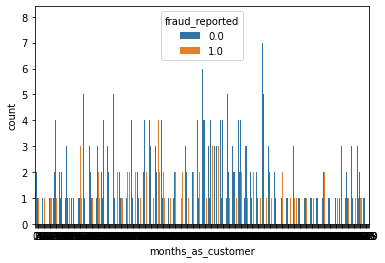

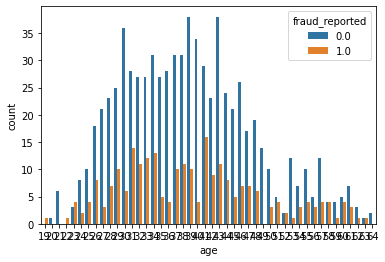

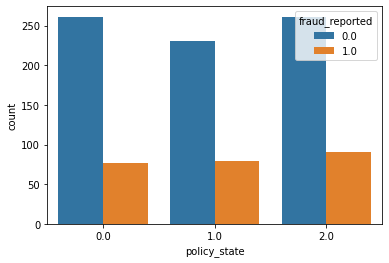

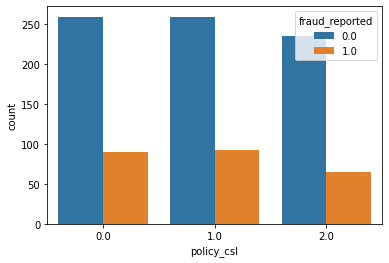

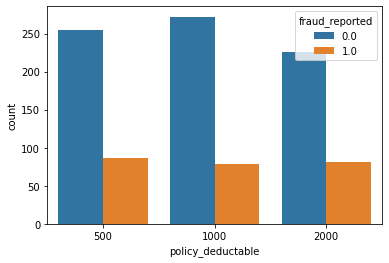

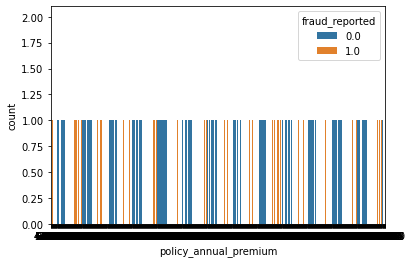

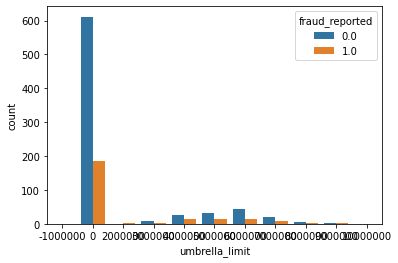

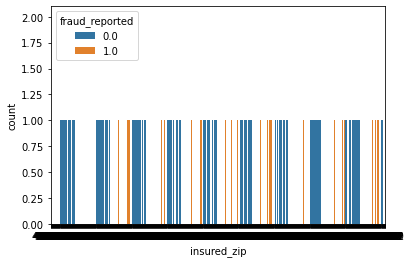

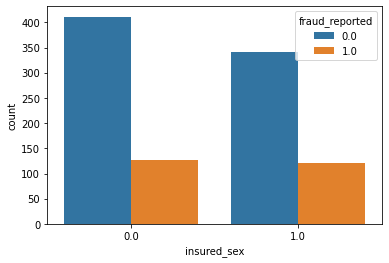

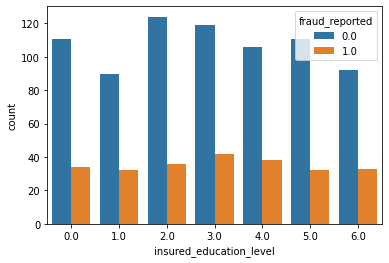

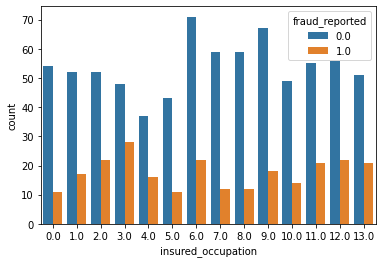

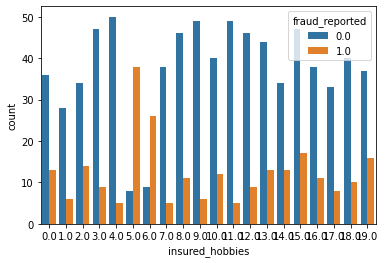

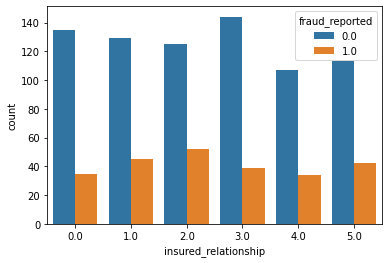

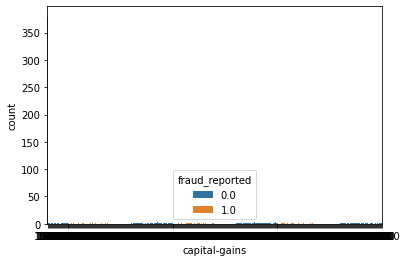

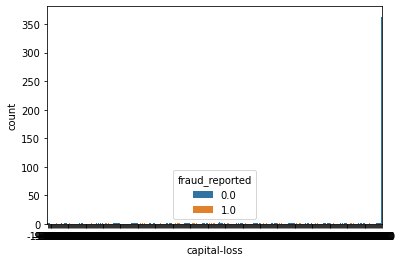

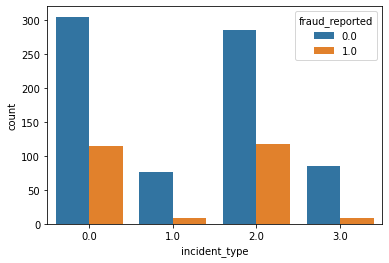

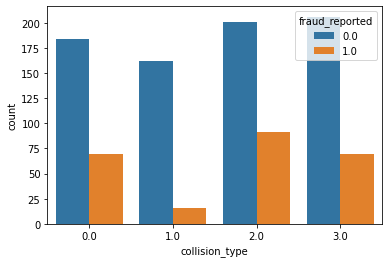

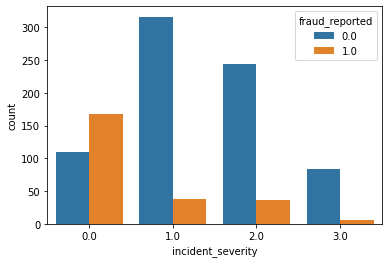

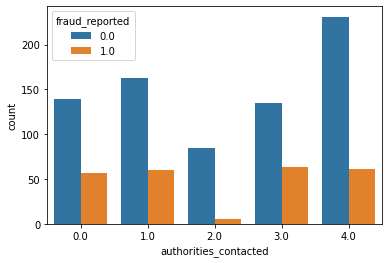

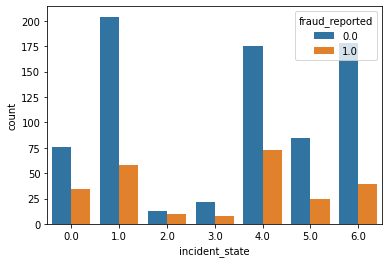

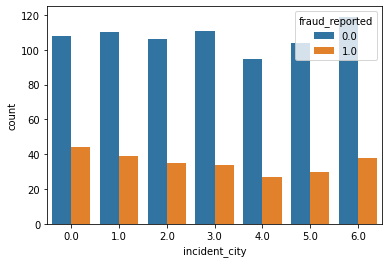

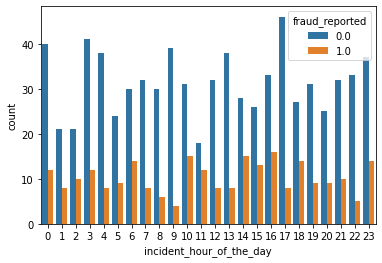

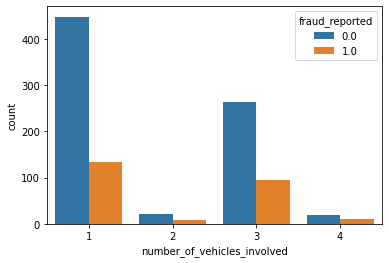

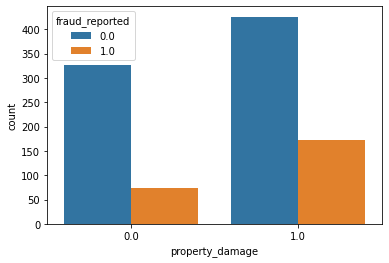

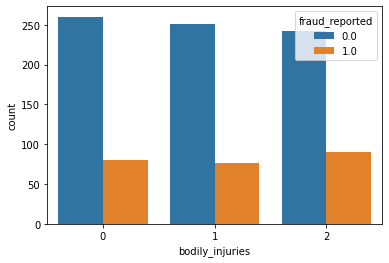

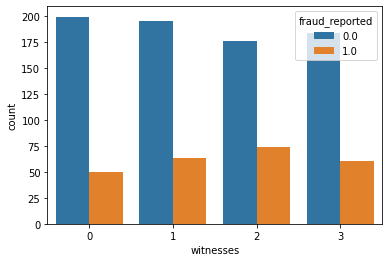

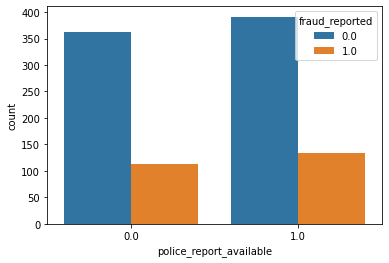

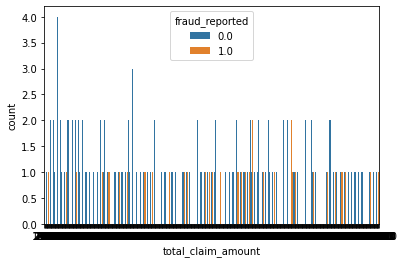

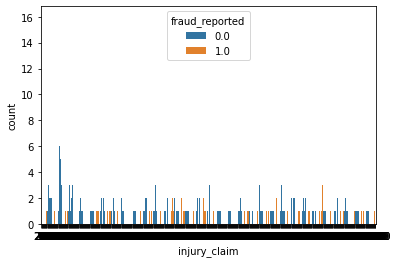

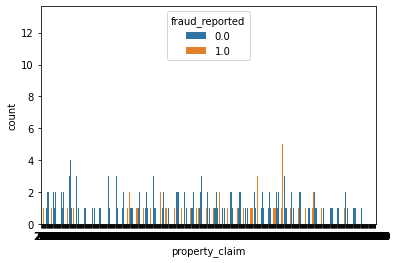

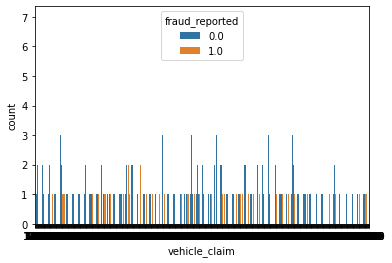

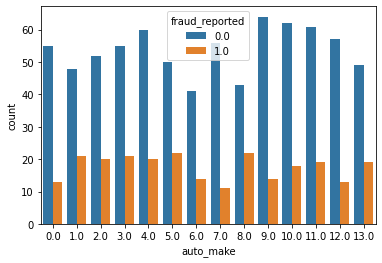

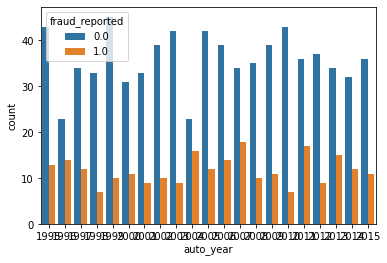

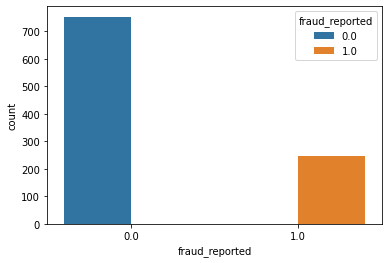

In [266]:
for i in data.keys():
    sns.countplot(x=i, data=data, hue="fraud_reported")
    plt.show()

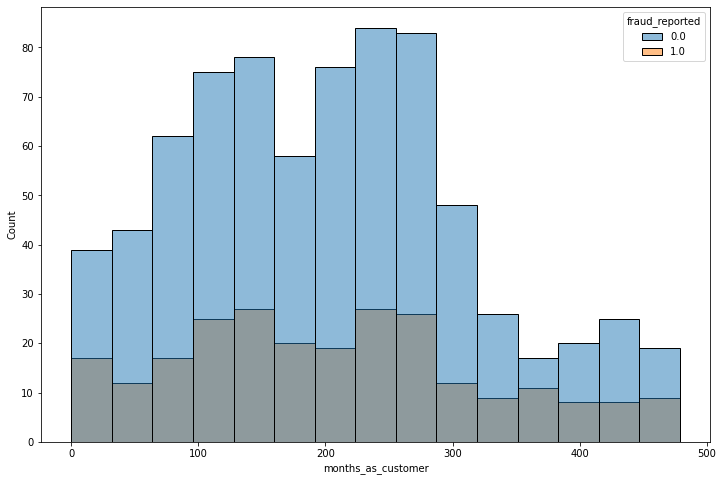

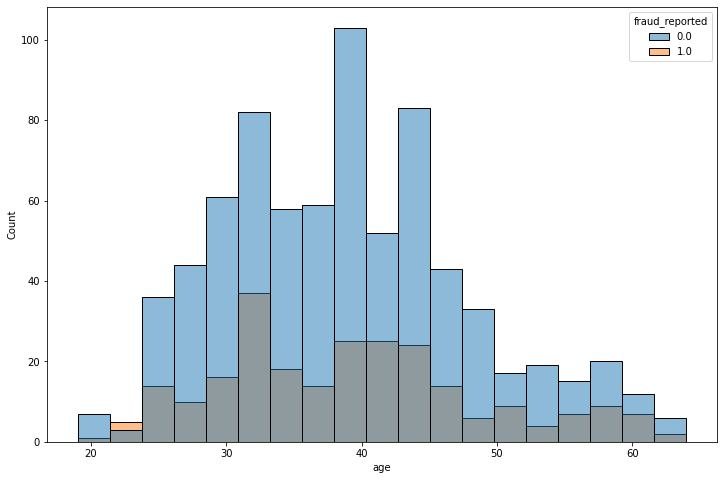

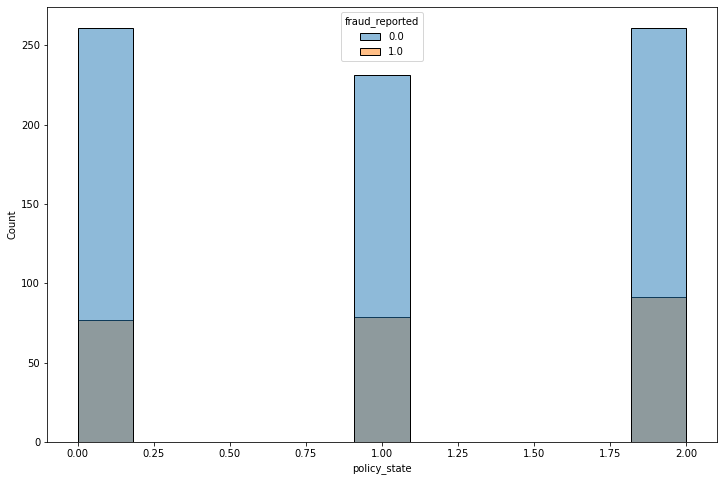

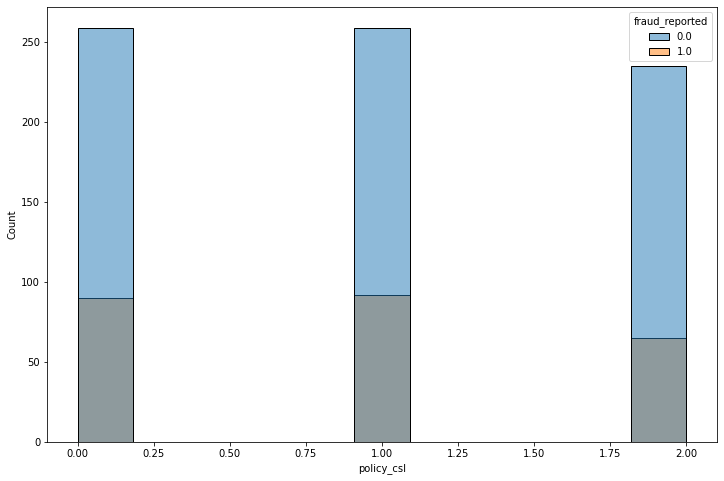

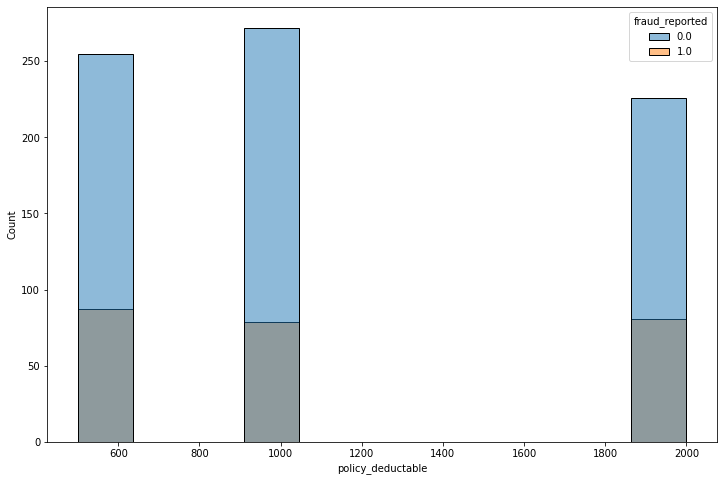

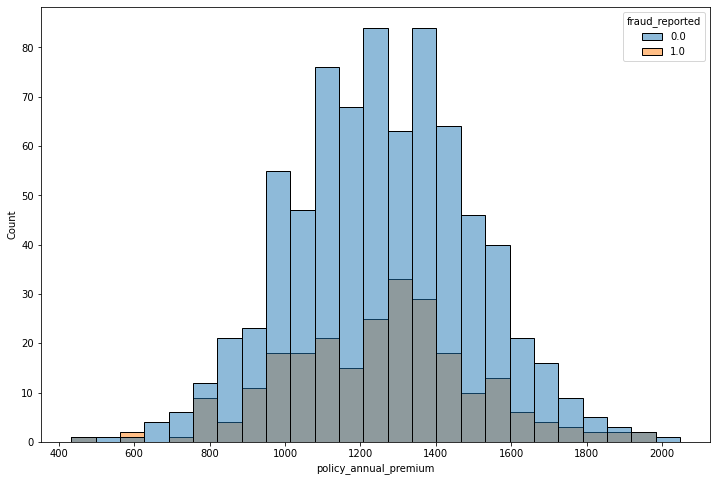

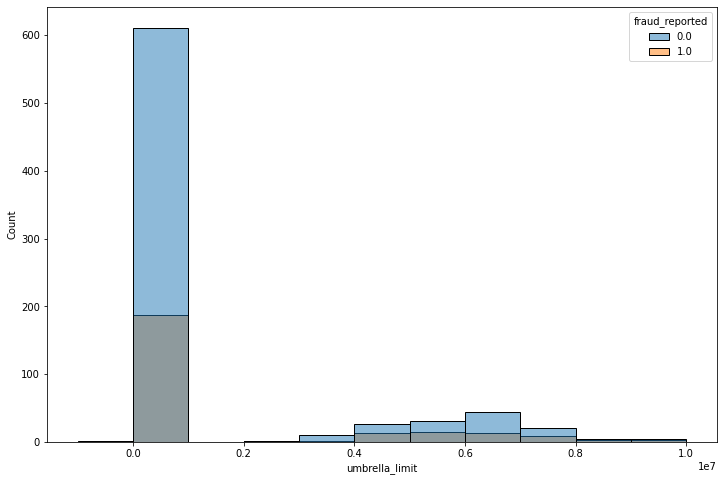

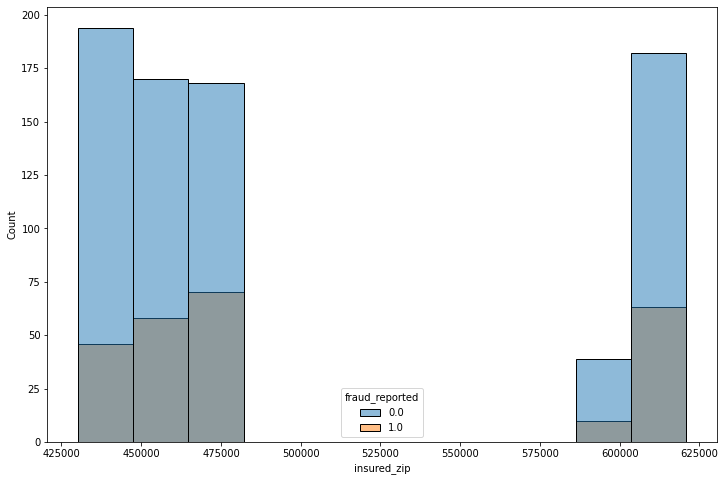

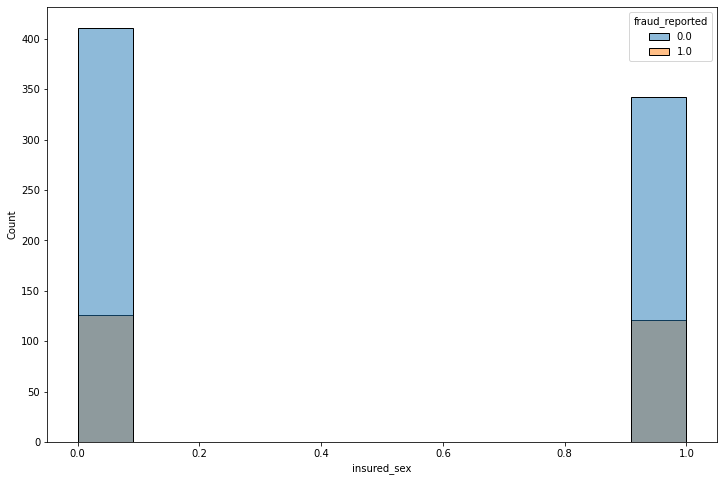

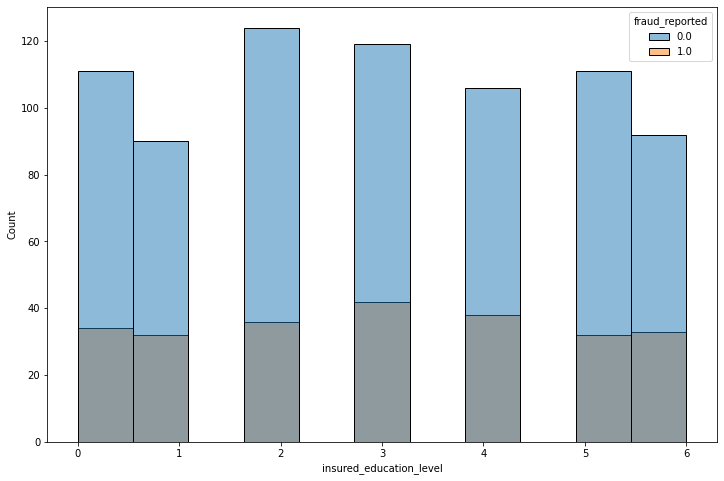

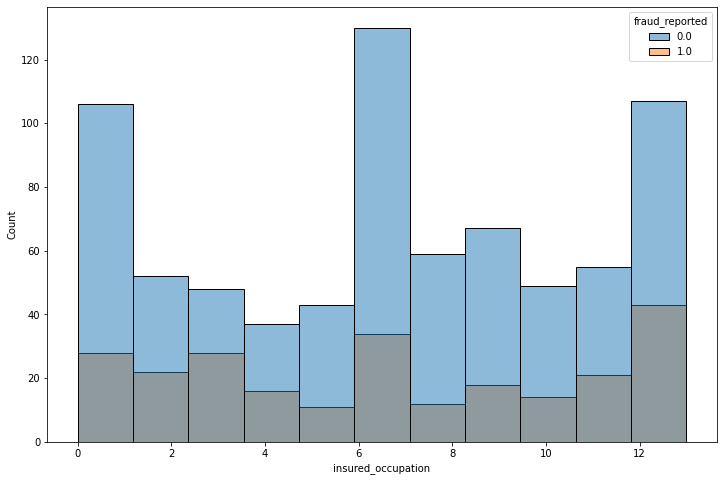

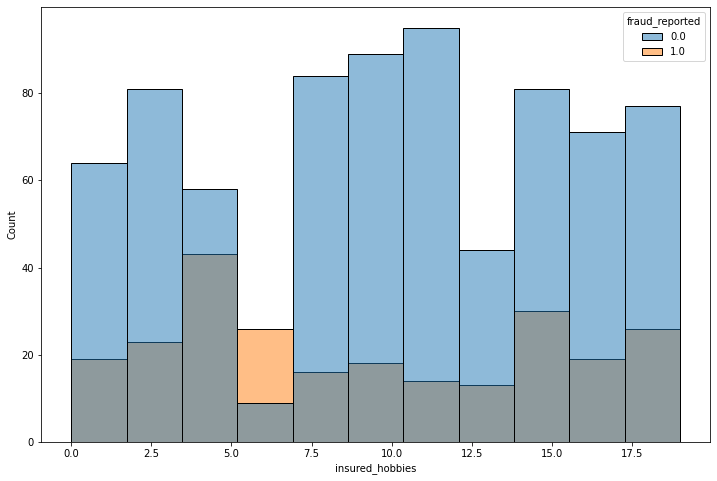

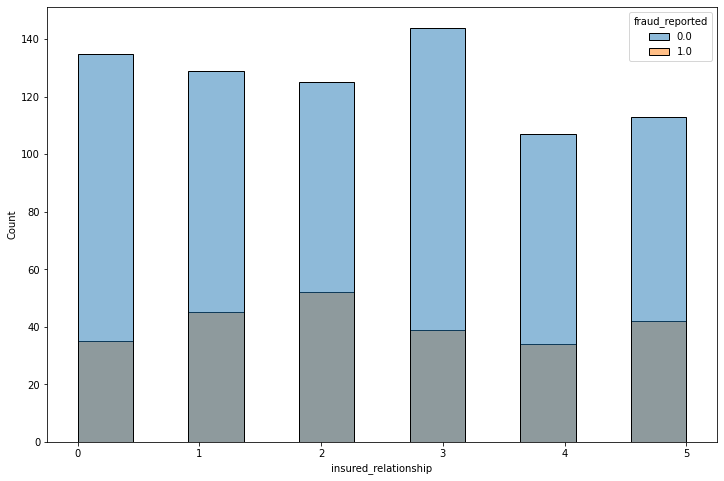

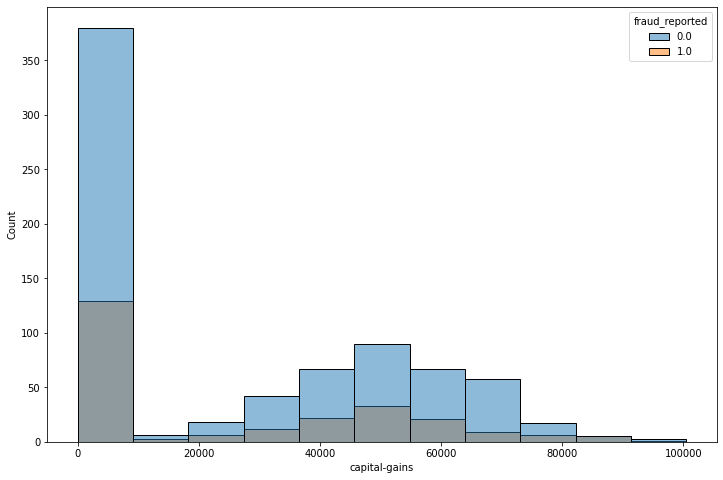

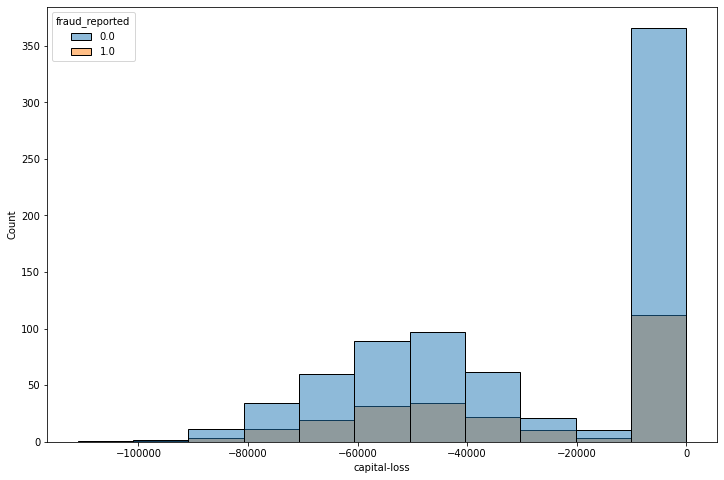

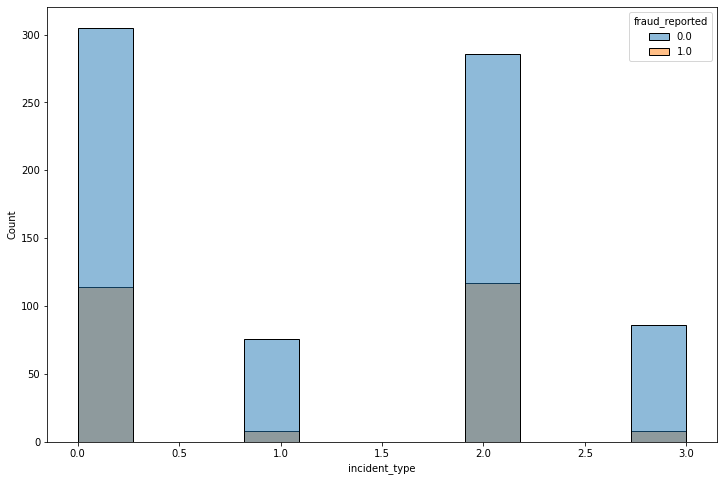

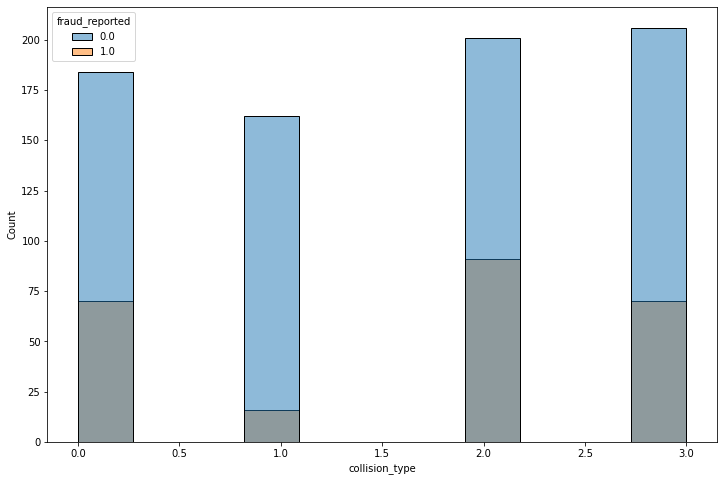

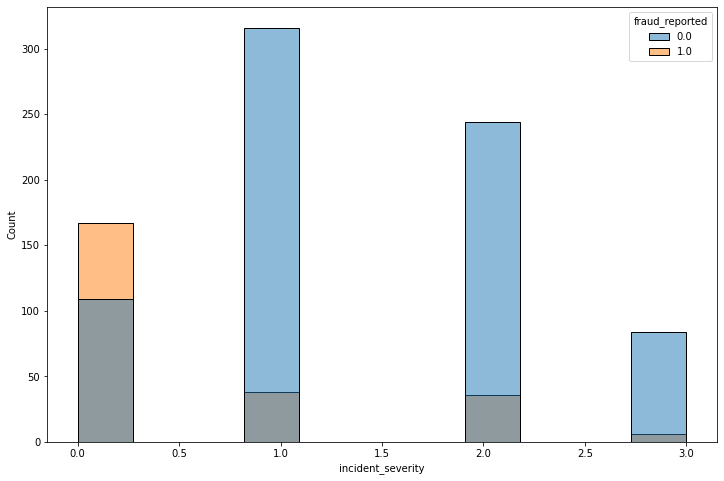

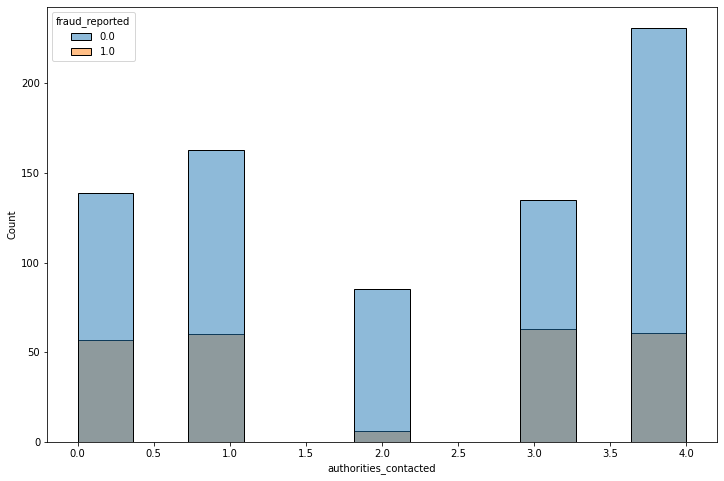

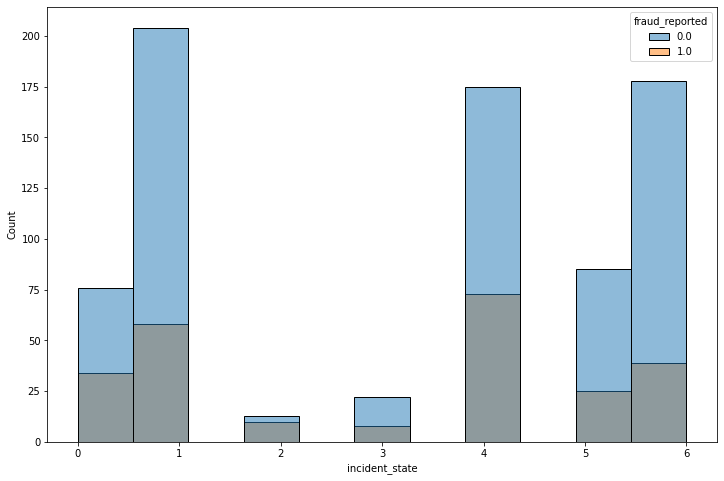

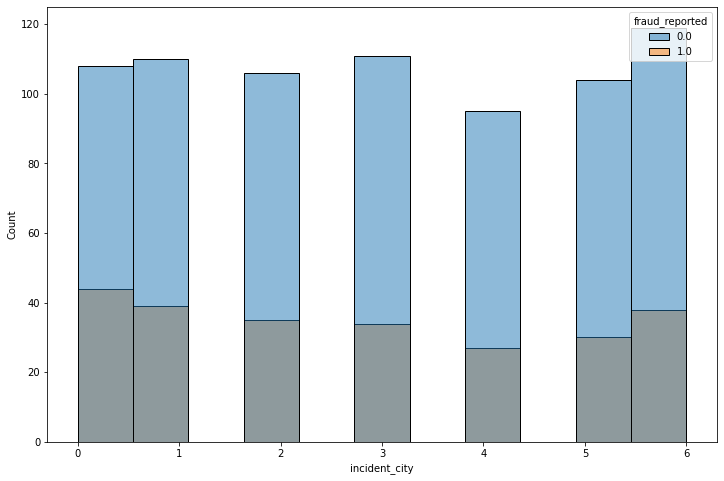

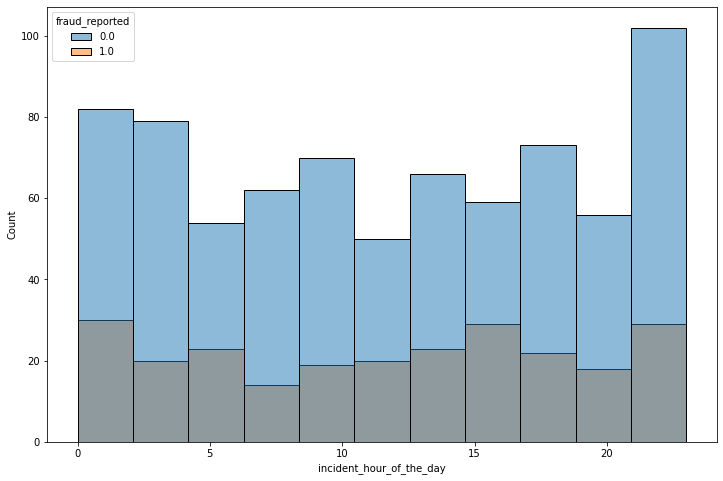

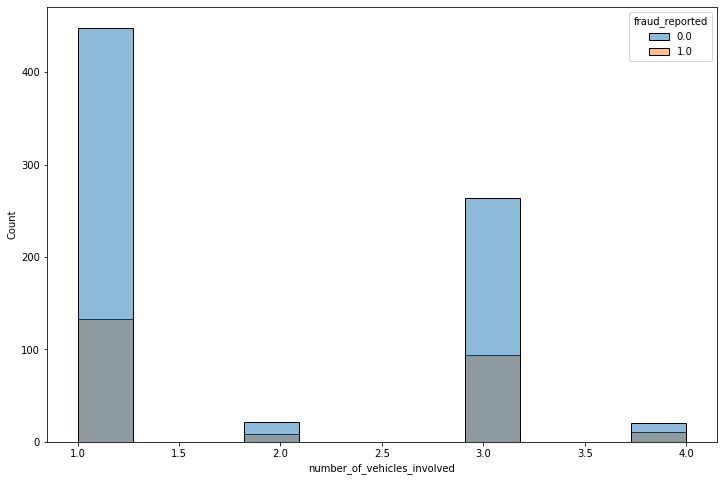

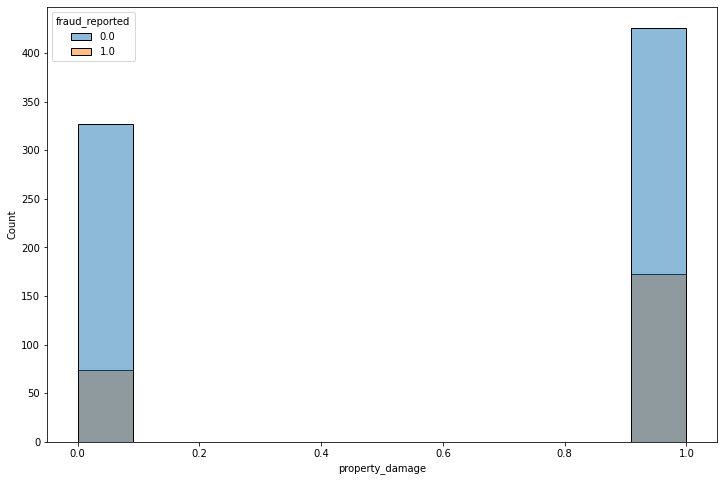

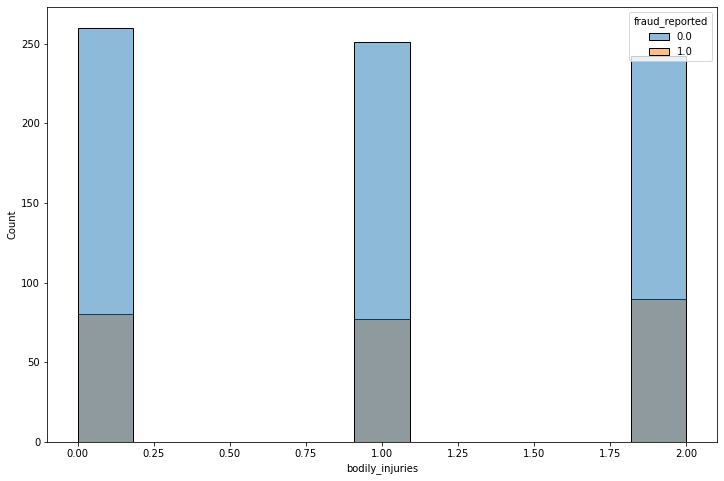

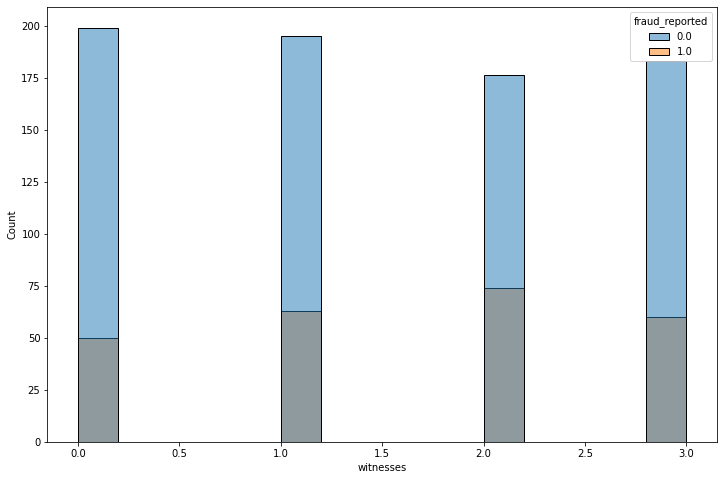

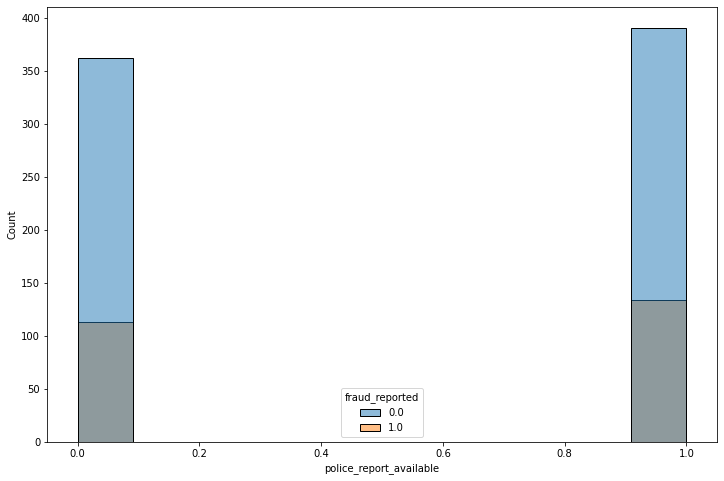

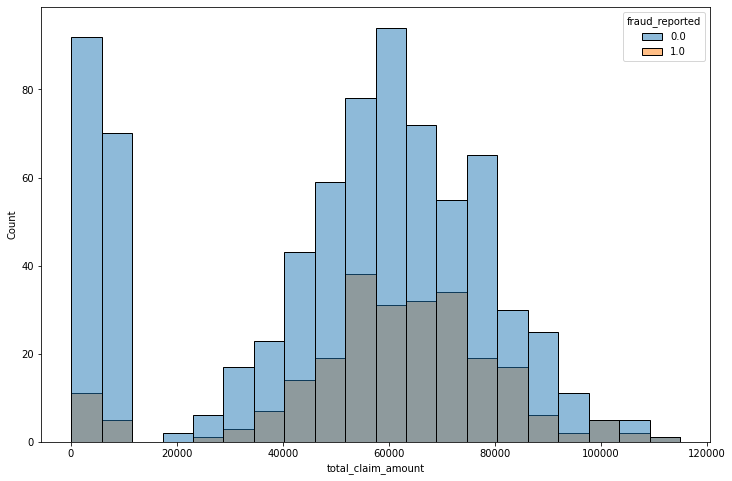

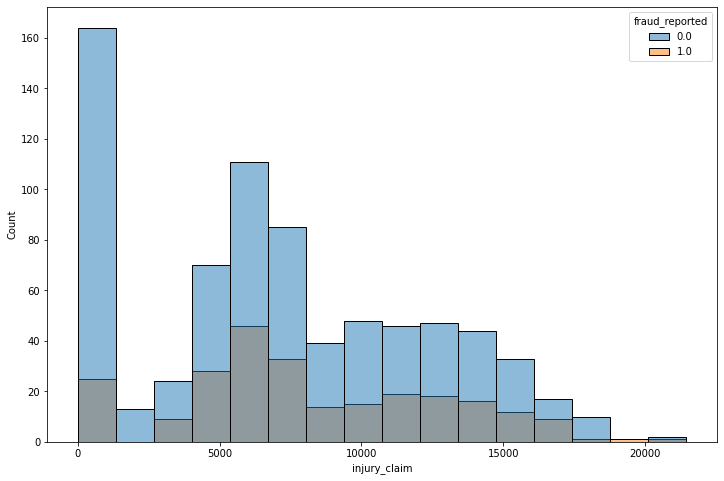

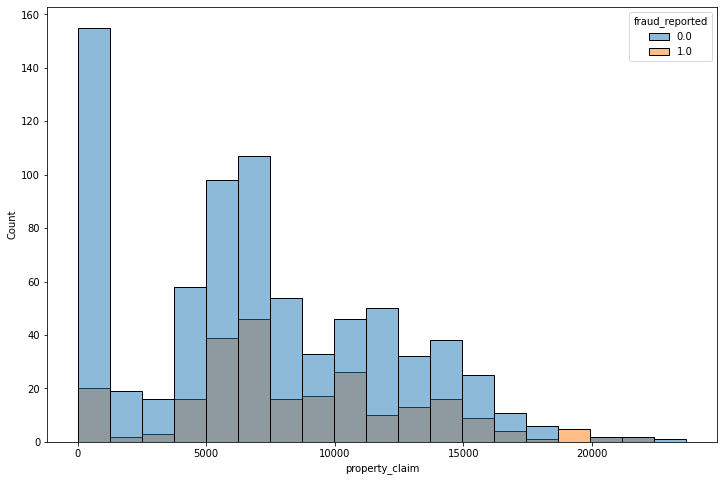

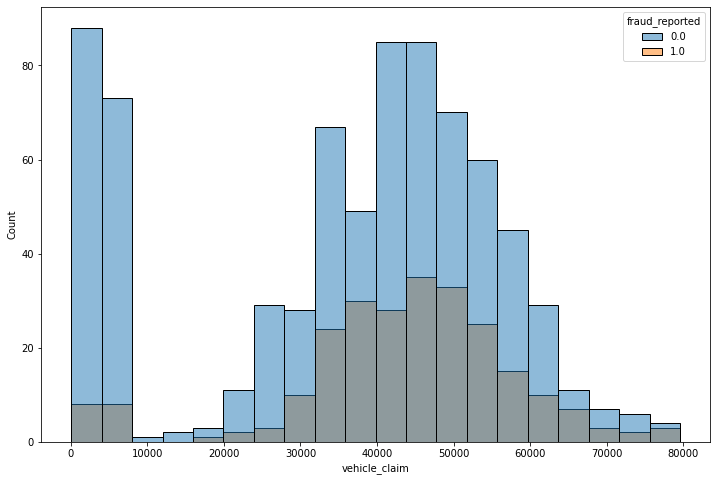

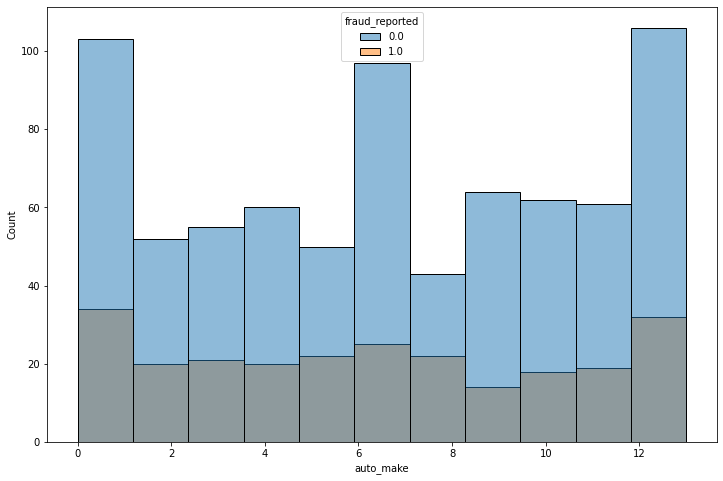

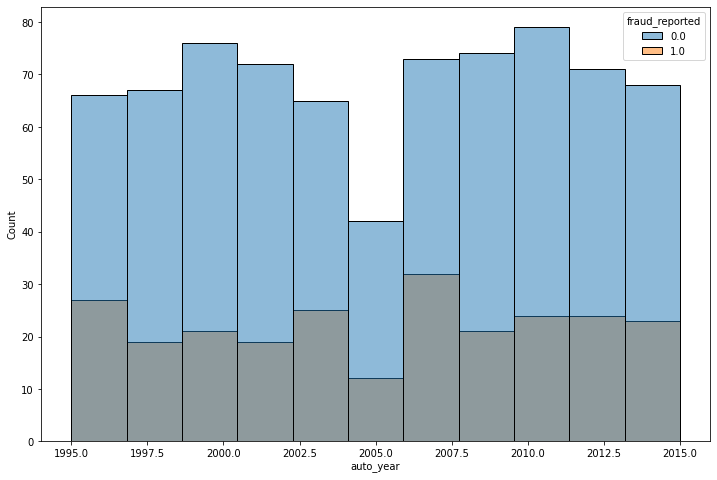

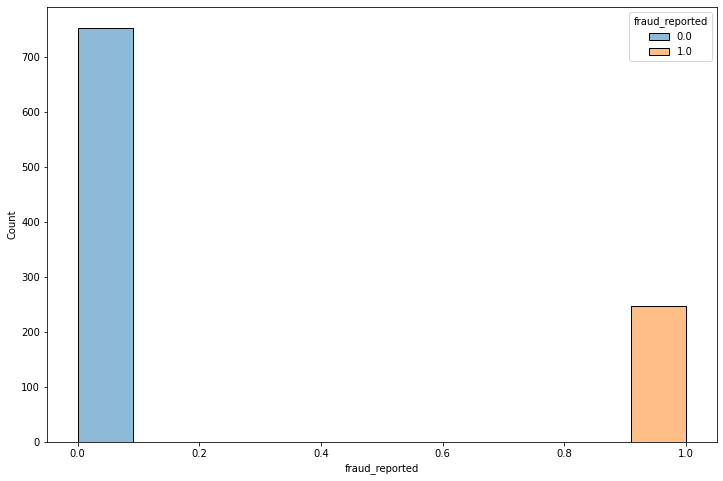

In [268]:
for i in data.keys():
    plt.figure(figsize=(12,8))
    sns.histplot(x=i, data=data, hue="fraud_reported")
    plt.show()

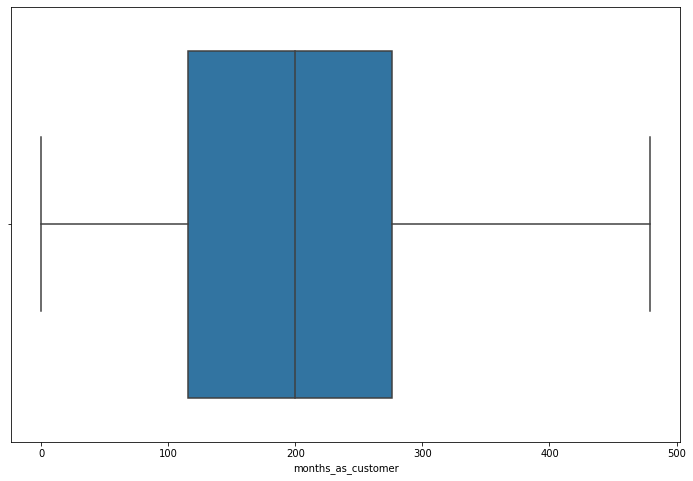

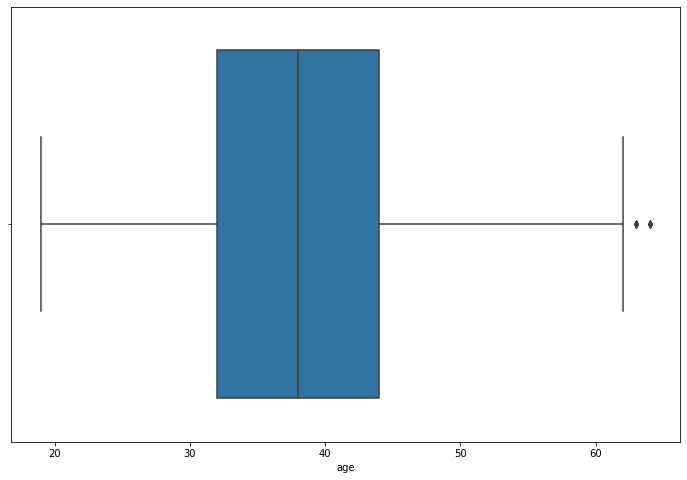

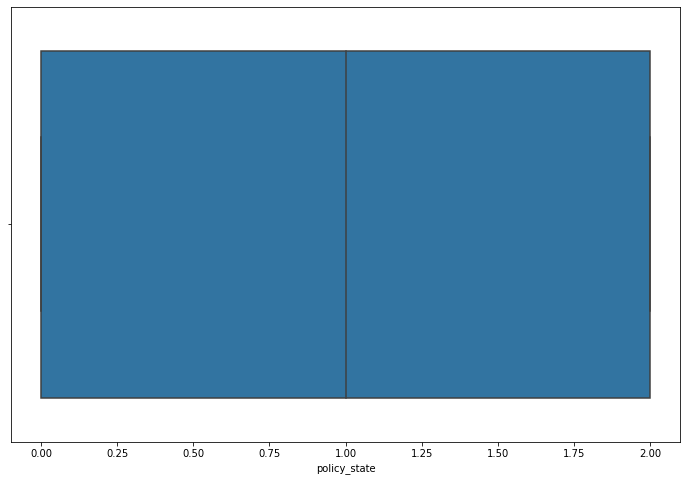

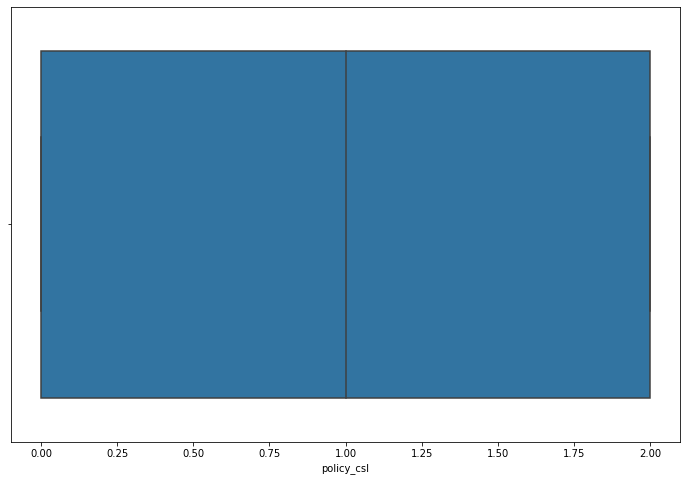

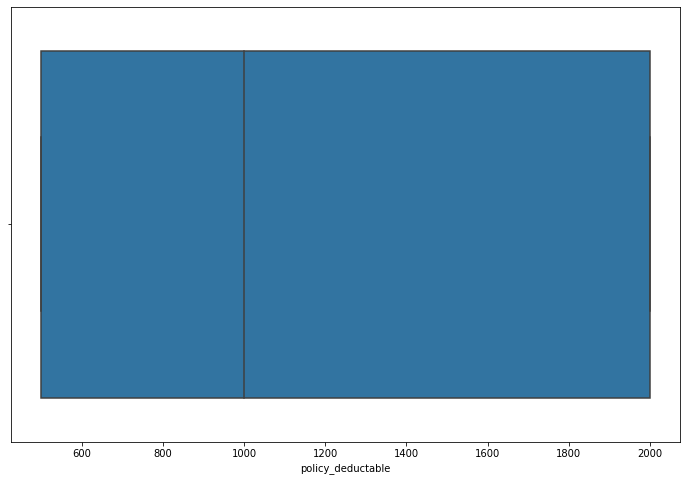

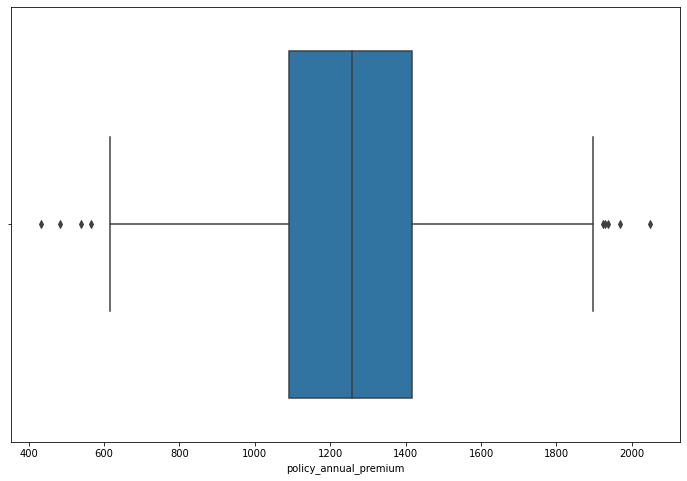

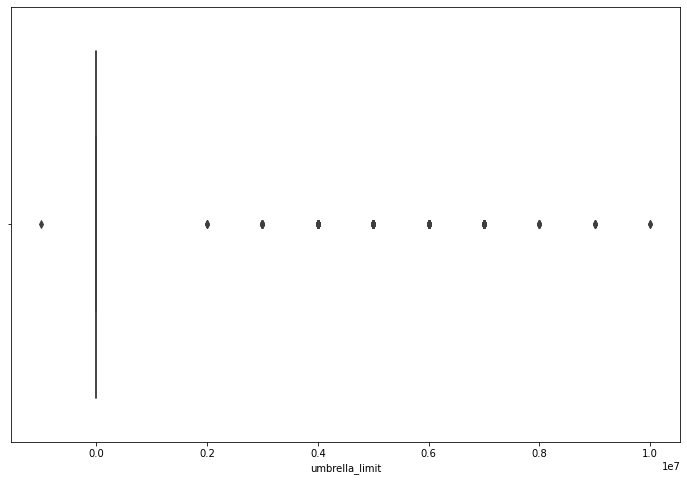

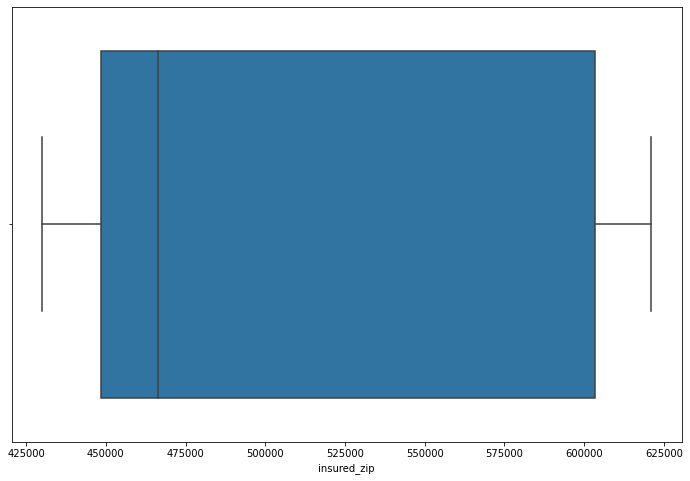

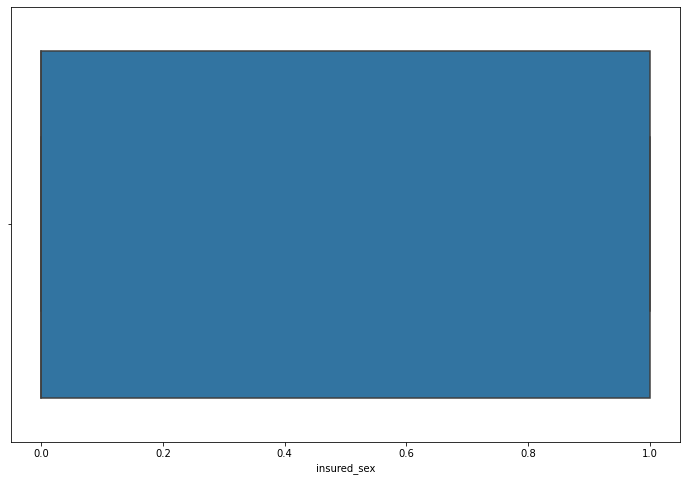

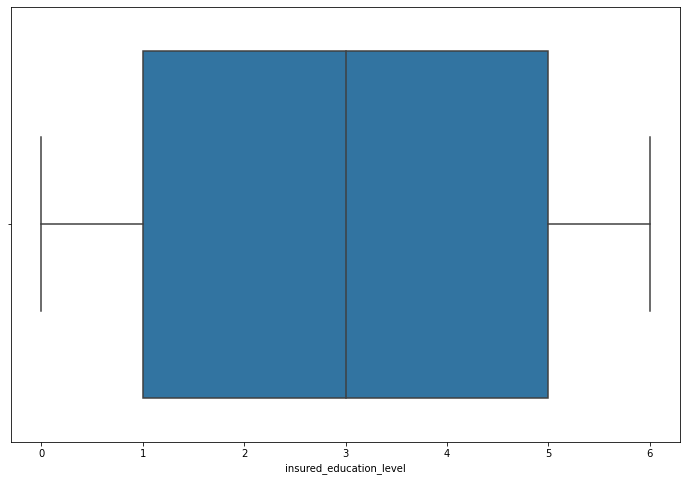

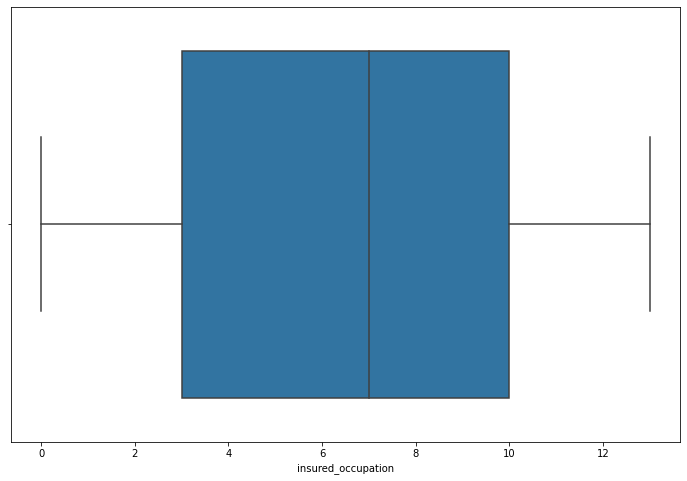

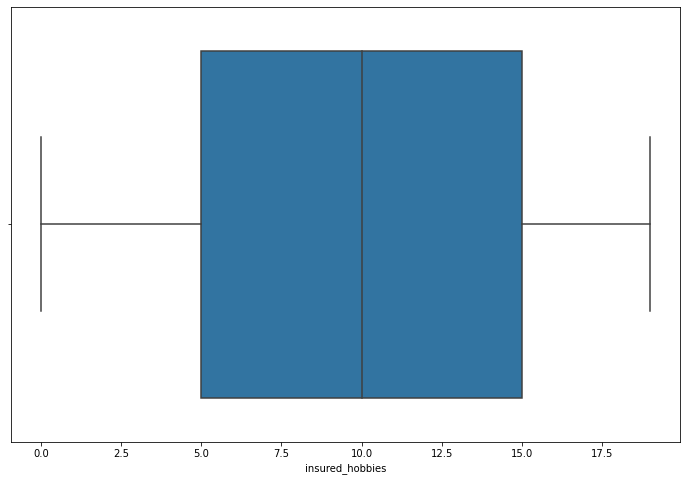

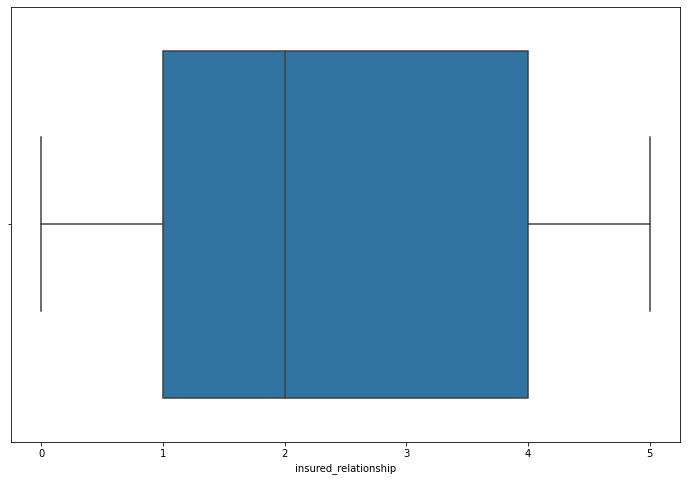

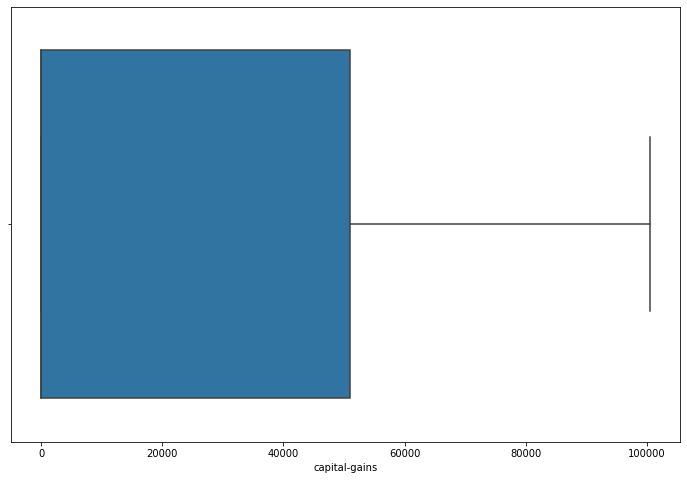

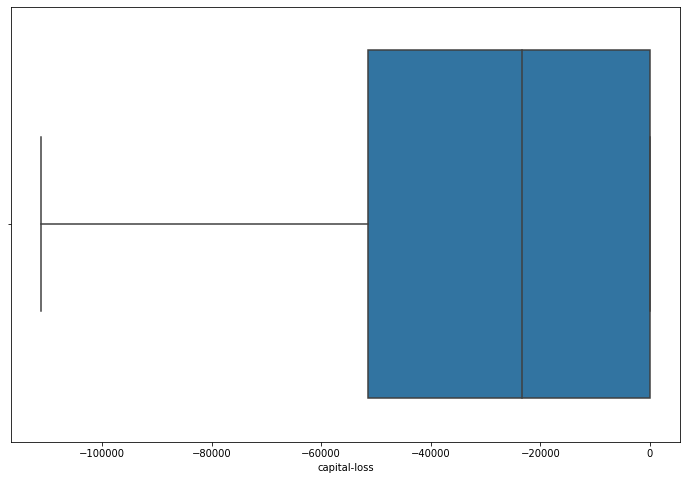

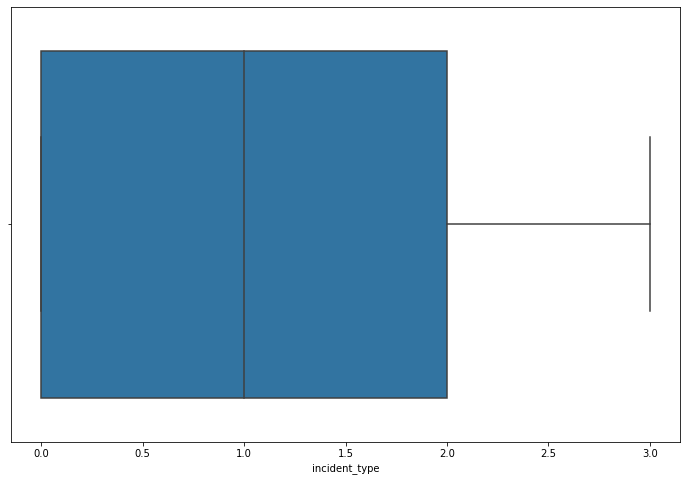

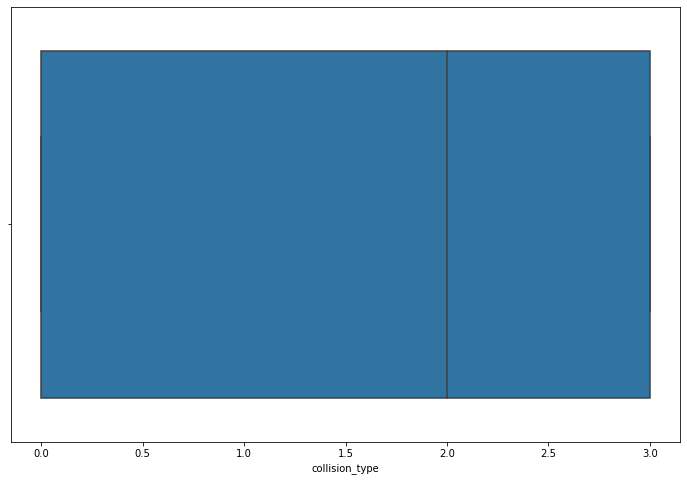

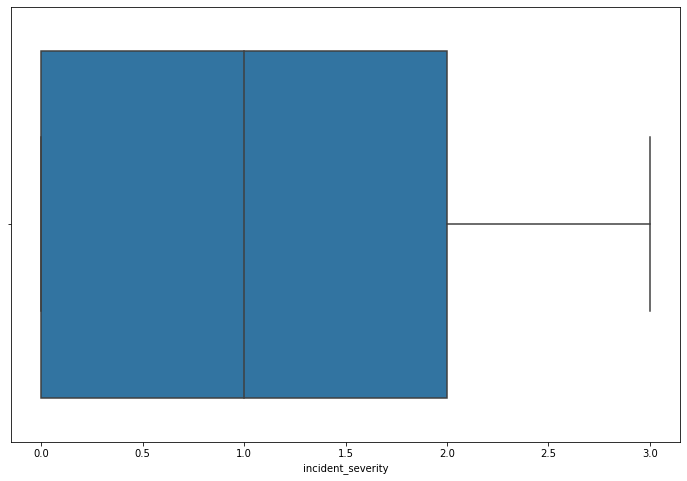

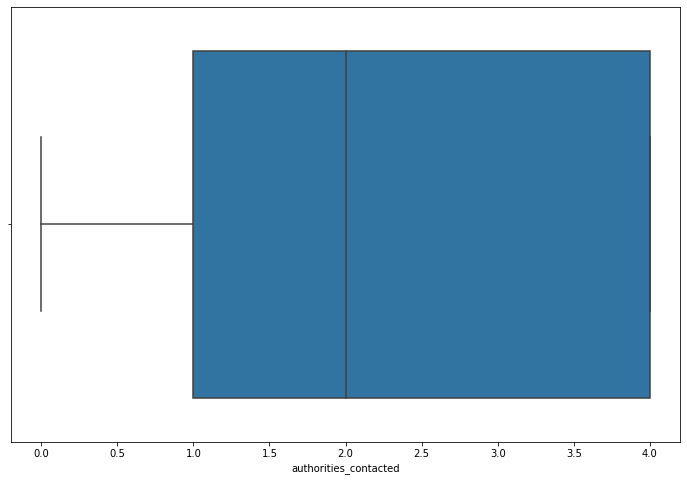

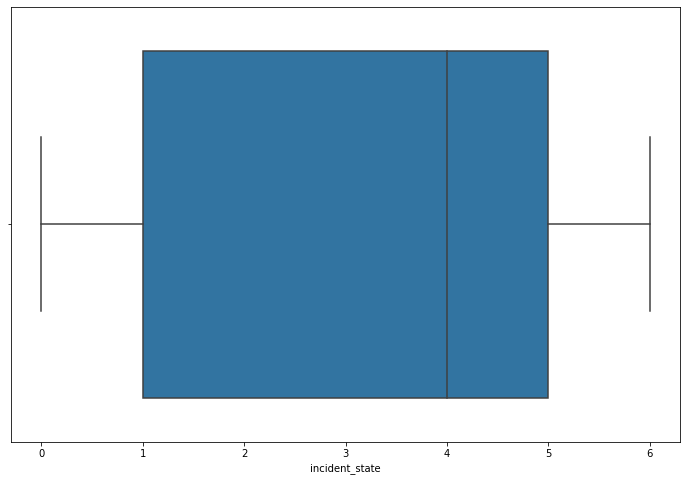

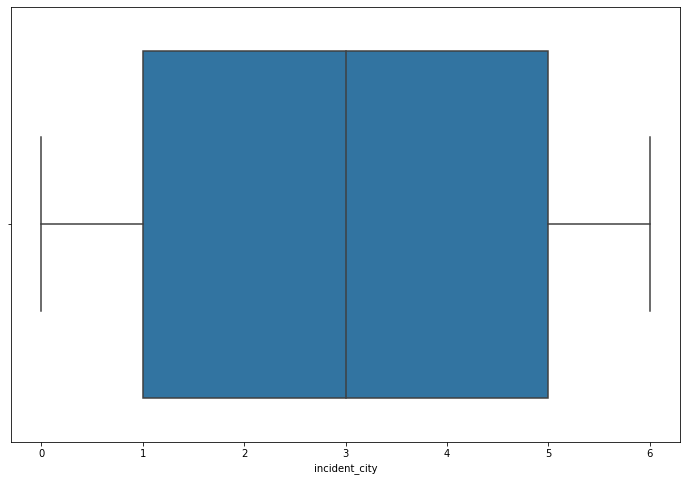

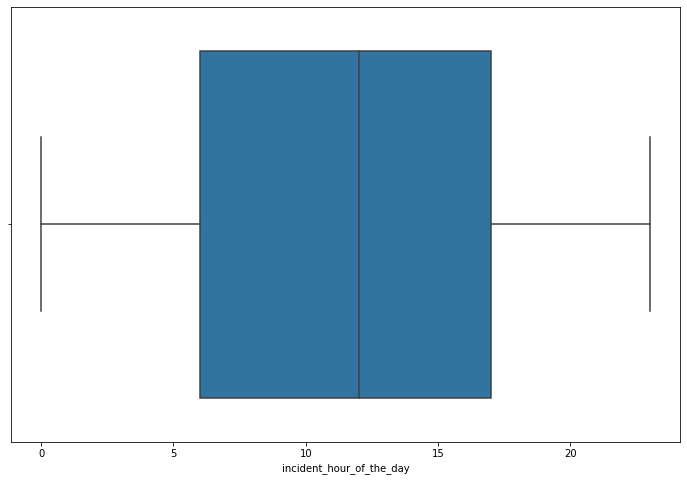

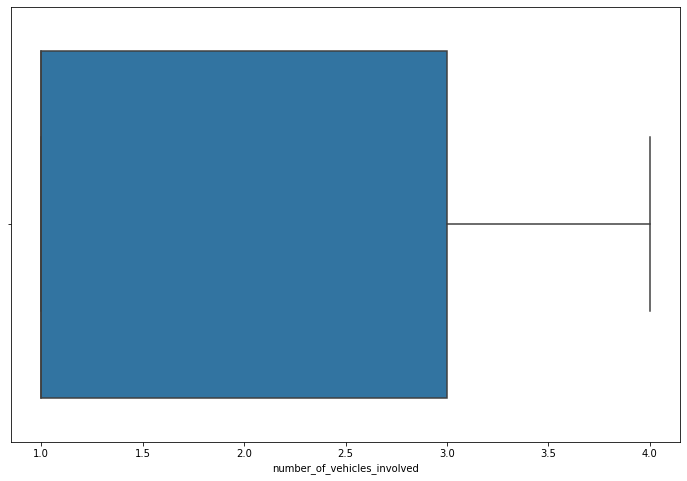

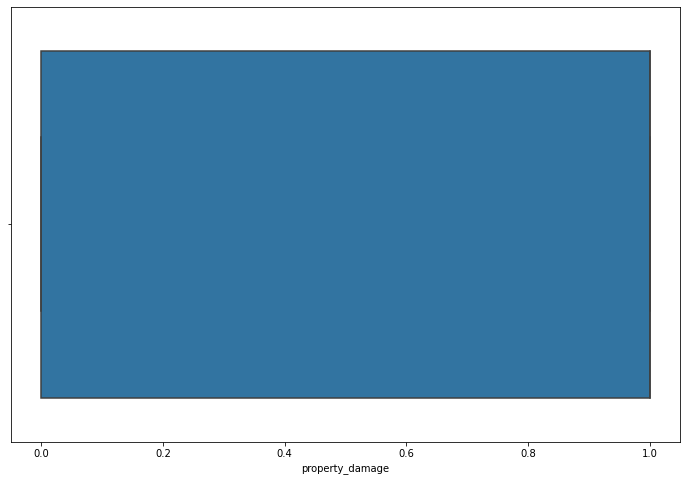

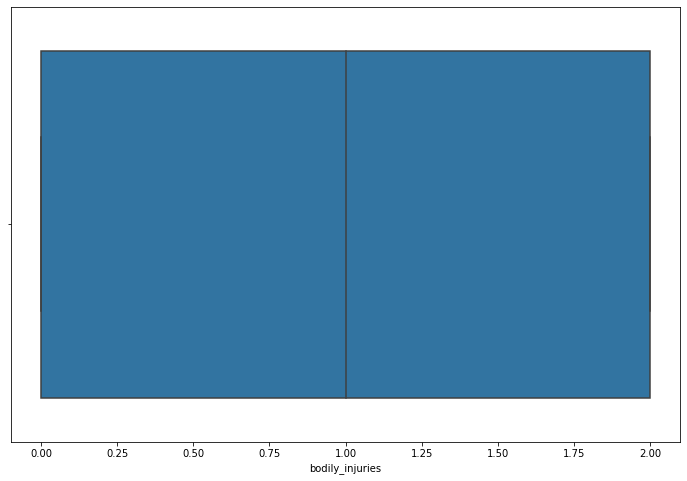

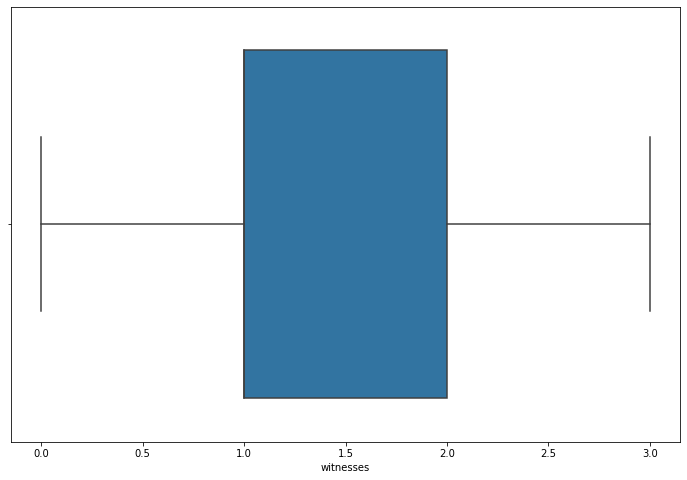

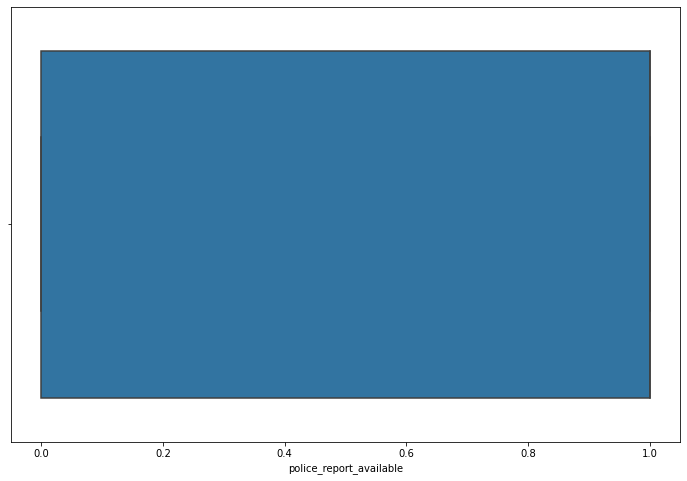

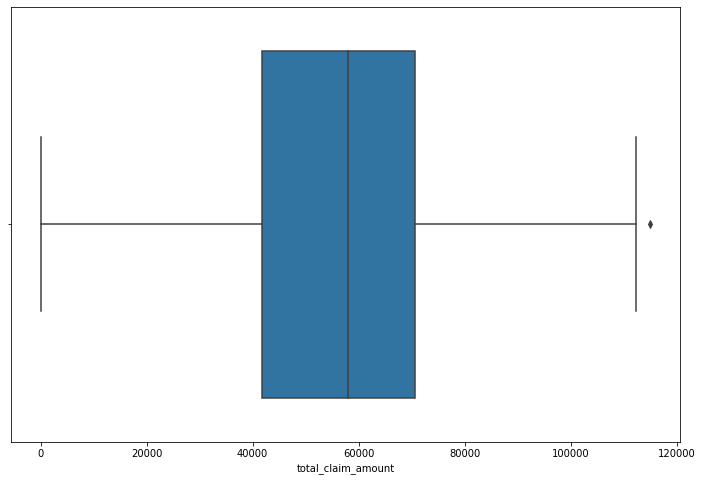

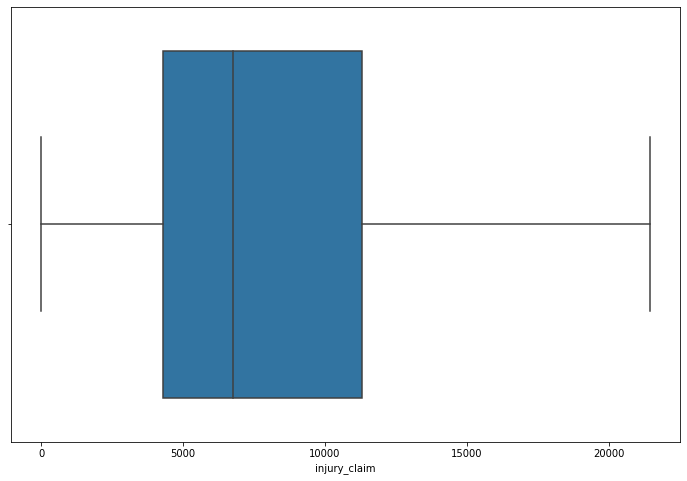

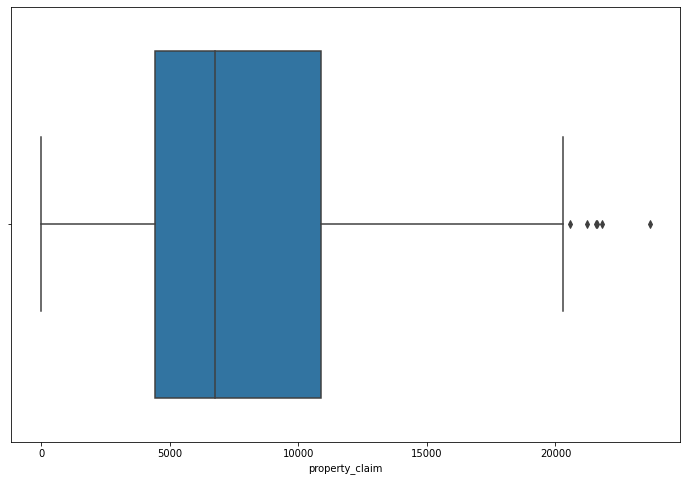

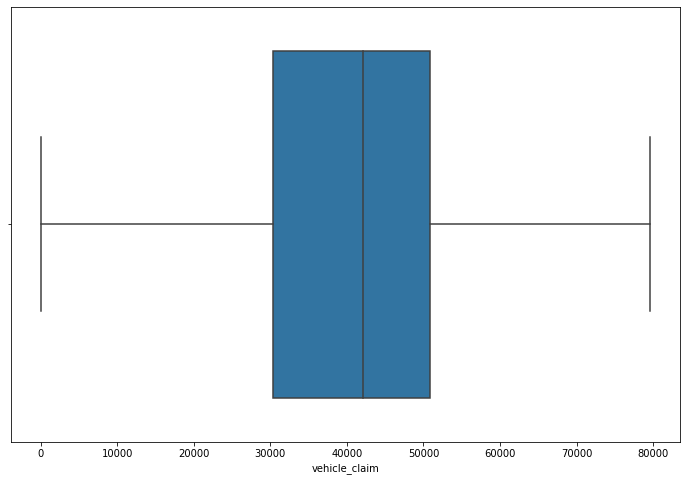

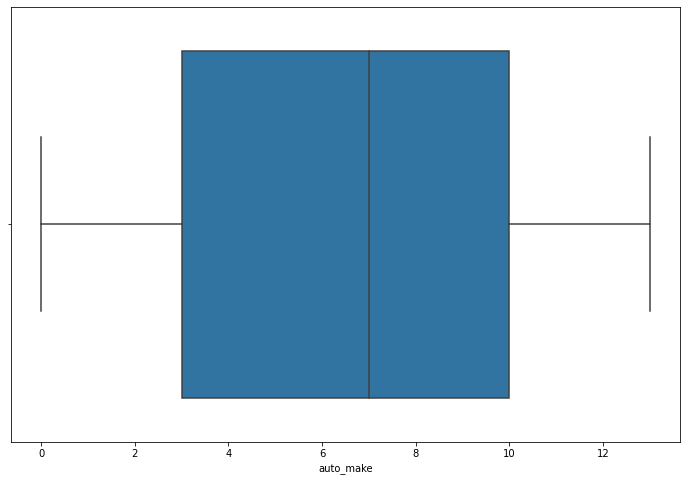

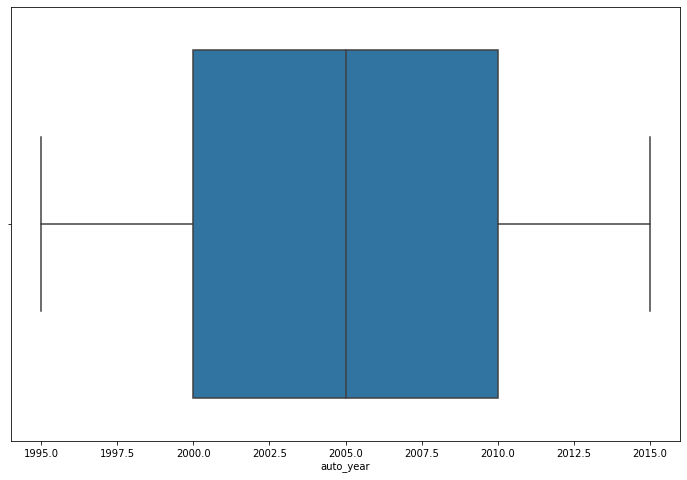

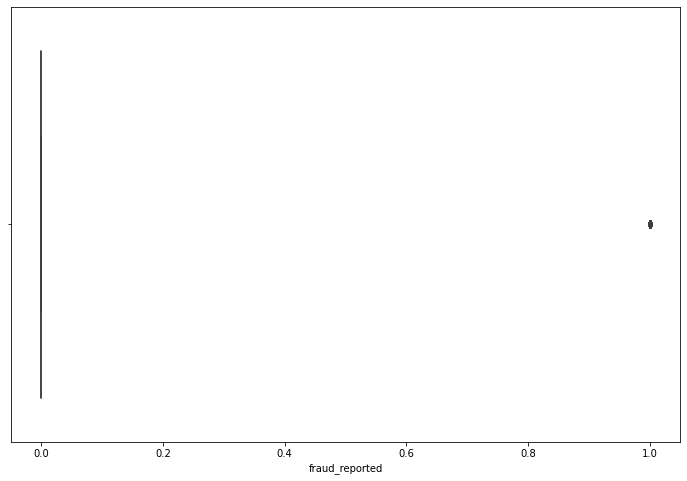

In [269]:
#Lets check if we have any outliers in the continous type of data
for i in data.keys():
    plt.figure(figsize=(12,8))
    sns.boxplot(x=i, data=data, hue="fraud_reported")
    plt.show()

There are few outliers in the continuous type of data in the dataset. This can be used to train the test set.

In [270]:
#Lets split our data into feature set x and target set y.

x = data.drop(["fraud_reported"], axis=1)
y = data["fraud_reported"]

In [271]:
x.shape, y.shape

((1000, 33), (1000,))

###### Train Test Split:
    Lets split our data into train set and test set.

In [272]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [273]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(800, 33) (200, 33) (800,) (200,)


###### Standard Scaling :
    Lets scale our data to bring all the datasets to similar scale.

In [274]:
x_train.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year
382,113,29,2.0,1.0,2000,1091.73,0,601213,1.0,6.0,3.0,9.0,1.0,36100,-42300,0.0,2.0,1.0,3.0,1.0,6.0,15,3,1.0,0,2,1.0,49950,5550,5550,38850,9.0,2004
994,141,30,1.0,2.0,1000,1347.04,0,430665,1.0,2.0,11.0,3.0,3.0,0,-82100,1.0,1.0,1.0,2.0,4.0,3.0,6,1,0.0,1,2,1.0,6480,540,1080,4860,6.0,1996
982,230,43,1.0,2.0,2000,1101.83,0,451529,1.0,2.0,3.0,6.0,2.0,28900,0,0.0,0.0,1.0,4.0,1.0,0.0,0,3,1.0,0,3,1.0,51900,5190,10380,36330,2.0,2011
47,355,47,2.0,2.0,2000,1273.70,4000000,433473,1.0,1.0,7.0,11.0,0.0,0,0,0.0,0.0,0.0,1.0,6.0,0.0,19,3,0.0,2,1,0.0,62800,6280,6280,50240,1.0,2003
521,5,26,0.0,1.0,2000,1137.02,0,468872,0.0,6.0,4.0,16.0,1.0,31500,0,2.0,2.0,2.0,0.0,6.0,6.0,22,1,1.0,1,3,1.0,88110,16020,16020,56070,1.0,2003


In [275]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

###### Model Building :

In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [280]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()
gnb=GaussianNB()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

model=[lr, dtc, knn, svc, gnb, rfc, abc, gbc]

In [281]:
for m in model:
    m.fit(x_train, y_train)
    pred_m=m.predict(x_test)
    acc_m=accuracy_score(y_test, pred_m)
    fpr,tpr,thresholds=roc_curve(y_test,pred_m)
    auc_score=roc_auc_score(y_test,pred_m)
    print('Accuracy Score of',m,'is :',acc_m)
    print("Confusion_Matrix",confusion_matrix(y_test,pred_m))
    print("Classification_Report", classification_report(y_test,pred_m))
    print("auc_score", auc_score)
    print('\n')

Accuracy Score of LogisticRegression() is : 0.775
Confusion_Matrix [[137   9]
 [ 36  18]]
Classification_Report               precision    recall  f1-score   support

         0.0       0.79      0.94      0.86       146
         1.0       0.67      0.33      0.44        54

    accuracy                           0.78       200
   macro avg       0.73      0.64      0.65       200
weighted avg       0.76      0.78      0.75       200

auc_score 0.6358447488584474


Accuracy Score of DecisionTreeClassifier() is : 0.795
Confusion_Matrix [[124  22]
 [ 19  35]]
Classification_Report               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       146
         1.0       0.61      0.65      0.63        54

    accuracy                           0.80       200
   macro avg       0.74      0.75      0.74       200
weighted avg       0.80      0.80      0.80       200

auc_score 0.7487316083206496


Accuracy Score of KNeighborsClassifier() is : 0.705
Conf

Great..!!, We have got 86% of accuracy score with 81% of AUC Score from GradientBoostingClassifier ensemble Technique Model.
Lets work on the Hyper Parameter Tuning to fine tune the performace.

###### Hyper Parameter tuning:

In [283]:
from sklearn.model_selection import GridSearchCV

In [284]:
#import warnings
#warnings.filterwarnings("ignore")

In [285]:
param={'criterion' :['friedman_mse', 'mse'],
       'loss' : ['deviance', 'exponential'],
       "learning_rate":[0.001,0.01,0.1],
       "n_estimators":[10,100,200]}

In [286]:
GCV=GridSearchCV(gbc, param, refit=True, cv=3, verbose=2)
GCV.fit(x_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END criterion=friedman_mse, learning_rate=0.001, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.001, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.001, loss=deviance, n_estimators=10; total time=   0.0s
[CV] END criterion=friedman_mse, learning_rate=0.001, loss=deviance, n_estimators=100; total time=   0.2s
[CV] END criterion=friedman_mse, learning_rate=0.001, loss=deviance, n_estimators=100; total time=   0.2s
[CV] END criterion=friedman_mse, learning_rate=0.001, loss=deviance, n_estimators=100; total time=   0.2s
[CV] END criterion=friedman_mse, learning_rate=0.001, loss=deviance, n_estimators=200; total time=   0.5s
[CV] END criterion=friedman_mse, learning_rate=0.001, loss=deviance, n_estimators=200; total time=   0.5s
[CV] END criterion=friedman_mse, learning_rate=0.001, loss=deviance, n_estimators=200; total 

[CV] END criterion=mse, learning_rate=0.01, loss=deviance, n_estimators=200; total time=   0.3s
[CV] END criterion=mse, learning_rate=0.01, loss=deviance, n_estimators=200; total time=   0.3s
[CV] END criterion=mse, learning_rate=0.01, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.01, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.01, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.01, loss=exponential, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, learning_rate=0.01, loss=exponential, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, learning_rate=0.01, loss=exponential, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, learning_rate=0.01, loss=exponential, n_estimators=200; total time=   0.3s
[CV] END criterion=mse, learning_rate=0.01, loss=exponential, n_estimators=200; total time=   0.3s
[CV] END criterion=

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [10, 100, 200]},
             verbose=2)

In [287]:
print("Best Parameters : ",GCV.best_params_)
print("Best Estimator : ",GCV.best_estimator_)

Best Parameters :  {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'deviance', 'n_estimators': 200}
Best Estimator :  GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)


In [289]:
GCV_pred=GCV.predict(x_test)
print(classification_report(y_test,GCV_pred))
print("Accuracy Score :",accuracy_score(y_test,GCV_pred))
print("AUC Score :", roc_auc_score(y_test, GCV_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       146
         1.0       0.73      0.74      0.73        54

    accuracy                           0.85       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.86      0.85      0.86       200

Accuracy Score : 0.855
AUC Score : 0.8190005073566717


###### Receiver Operating Characteristic

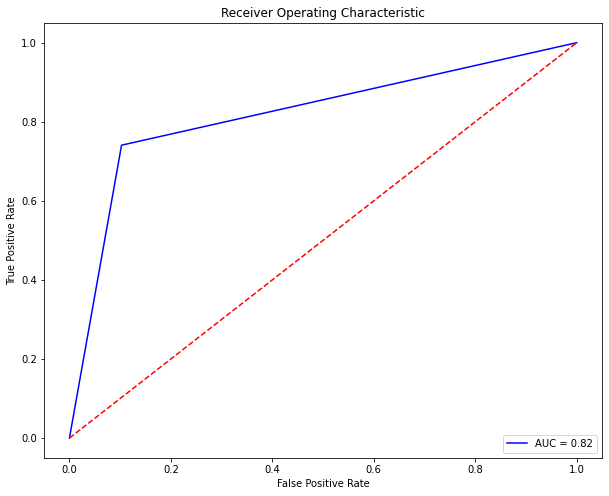

0.8190005073566717

In [294]:
fpr, tpr, threshold = roc_curve(y_test, GCV_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc_score=roc_auc_score(y_test,GCV_pred)
auc_score

###### Saving the Best Model :
    The performace is higher with GradientBoostingClassifier.Lets save the model.

In [295]:
import joblib
joblib.dump(GCV.best_estimator_,"InsuranceClaims-FraudDetection.obj")

['InsuranceClaims-FraudDetection.obj']